**Which machine learning model gives best accuracy results when predicting the process time for specific part of the process?**

**What is the minimum duration of a specific process, which gives the minimum possible process time?**

Process time_Measure

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("Process Time data for ML.csv", index_col=0)
dataset.head()

,topic,TimeStamp_Lift,contextId,commandState,date,TimeStamp_Lift_start,commandState_e,process time_Lift_s,handling time_Lift_s,cycle time_Lift_s,...,cycle time_Unlift_s,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue,handling_Glue to Unlift,handling_Lift to Measure_s,handling_Measure to Position_s,handling_Position to Punch_s,handling_Punch to Glue_s
0,brix/Procedures/Process eggs/2022-11-16-12:09:...,10:09.4,2022-11-16-12:09:16.364_9,Completed,16/11/2022,10:02.1,execute,7.340,1.10,8.440,...,9.880,0 days 00:00:01.100000,0 days 00:00:06.610000,0 days 00:00:07.640000,0 days 00:00:34.509000,0 days 00:00:08.020000,1.1,6.61,7.640,34.509
1,brix/Procedures/Process eggs/2022-11-16-12:09:...,09:59.6,2022-11-16-12:09:06.614_8,Completed,16/11/2022,09:52.3,execute,7.359,2.46,9.819,...,8.510,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:11.930000,0 days 00:00:34.669000,0 days 00:00:09.250000,1.1,1.10,11.930,34.669
2,brix/Procedures/Process eggs/2022-11-16-12:08:...,09:51.2,2022-11-16-12:08:58.085_7,Completed,16/11/2022,09:43.8,execute,7.400,1.10,8.500,...,9.740,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:07.610000,0 days 00:00:40.330000,0 days 00:00:07.949000,1.1,1.10,7.610,40.330
3,brix/Procedures/Process eggs/2022-11-16-12:08:...,09:41.3,2022-11-16-12:08:49.115_5,Completed,16/11/2022,09:34.7,execute,6.670,2.43,9.100,...,17.399,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:06.359000,0 days 00:00:32.610000,0 days 00:00:08.050000,1.1,1.10,6.359,32.610
4,brix/Procedures/Process eggs/2022-11-16-12:08:...,09:23.7,2022-11-16-12:08:29.885_4,Completed,16/11/2022,09:16.3,execute,7.330,11.01,18.340,...,8.540,0 days 00:00:01.100000,0 days 00:00:01.100000,0 days 00:00:05.670000,0 days 00:00:41.019000,0 days 00:00:09.410000,1.1,1.10,5.670,41.019


In [3]:
#drop coloms
dataset_1=dataset.copy()
dataset_12=dataset_1.drop(columns=['topic', 'TimeStamp_Lift', 'commandState', 'date', 'TimeStamp_Lift_start',
                                  'commandState_e','TimeStamp_Measure','TimeStamp_Measure_start','TimeStamp_Position',
                                   'TimeStamp_Position_start','TimeStamp_Punch','TimeStamp_Punch_start','TimeStamp_Glue',
                                  'TimeStamp_Glue_start','TimeStamp_Unlift','TimeStamp_Unlift_start','handling_Lift to Measure',
                                  'handling_Measure to Position','handling_Position to Punch','handling_Punch to Glue','handling_Glue to Unlift'])
dataset_12.head()

,contextId,process time_Lift_s,handling time_Lift_s,cycle time_Lift_s,process time_Measure_s,handling time_Measure_s,cycle time_Measure_s,process time_Position_s,handling time_Position_s,cycle time_Position_s,...,process time_Glue_s,handling time_Glue_s,cycle time_Glue_s,process time_Unlift_s,handling time_Unlift_s,cycle time_Unlift_s,handling_Lift to Measure_s,handling_Measure to Position_s,handling_Position to Punch_s,handling_Punch to Glue_s
0,2022-11-16-12:09:16.364_9,7.340,1.10,8.440,7.490,6.61,14.100,2.26,7.640,9.900,...,0.49,8.020,8.510,5.80,4.080,9.880,1.1,6.61,7.640,34.509
1,2022-11-16-12:09:06.614_8,7.359,2.46,9.819,8.700,1.10,9.800,2.17,11.930,14.100,...,0.49,9.250,9.740,5.82,2.690,8.510,1.1,1.10,11.930,34.669
2,2022-11-16-12:08:58.085_7,7.400,1.10,8.500,7.359,1.10,8.459,2.19,7.610,9.800,...,0.49,7.949,8.439,5.81,3.930,9.740,1.1,1.10,7.610,40.330
3,2022-11-16-12:08:49.115_5,6.670,2.43,9.100,8.730,1.10,9.830,2.10,6.359,8.459,...,0.49,17.010,17.500,5.82,11.579,17.399,1.1,1.10,6.359,32.610
4,2022-11-16-12:08:29.885_4,7.330,11.01,18.340,8.810,8.87,17.680,2.10,15.500,17.600,...,0.49,9.410,9.900,5.82,2.720,8.540,1.1,1.10,5.670,41.019


In [4]:
#drop coloms
dataset_13=dataset_12.drop(columns=['cycle time_Lift_s', 'cycle time_Measure_s', 'cycle time_Position_s', 'cycle time_Punch_s',
                                    'cycle time_Glue_s','cycle time_Unlift_s'])
dataset_13.head()

,contextId,process time_Lift_s,handling time_Lift_s,process time_Measure_s,handling time_Measure_s,process time_Position_s,handling time_Position_s,process time_Punch_s,handling time_Punch_s,process time_Glue_s,handling time_Glue_s,process time_Unlift_s,handling time_Unlift_s,handling_Lift to Measure_s,handling_Measure to Position_s,handling_Position to Punch_s,handling_Punch to Glue_s
0,2022-11-16-12:09:16.364_9,7.340,1.10,7.490,6.61,2.26,7.640,1.17,7.370,0.49,8.020,5.80,4.080,1.1,6.61,7.640,34.509
1,2022-11-16-12:09:06.614_8,7.359,2.46,8.700,1.10,2.17,11.930,1.17,8.730,0.49,9.250,5.82,2.690,1.1,1.10,11.930,34.669
2,2022-11-16-12:08:58.085_7,7.400,1.10,7.359,1.10,2.19,7.610,1.17,12.930,0.49,7.949,5.81,3.930,1.1,1.10,7.610,40.330
3,2022-11-16-12:08:49.115_5,6.670,2.43,8.730,1.10,2.10,6.359,1.19,8.610,0.49,17.010,5.82,11.579,1.1,1.10,6.359,32.610
4,2022-11-16-12:08:29.885_4,7.330,11.01,8.810,8.87,2.10,15.500,1.17,17.119,0.49,9.410,5.82,2.720,1.1,1.10,5.670,41.019


In [5]:

dataset_13=dataset_13.rename({'process time_Lift_s':'process time_Lift' , 'handling time_Lift_s':'handling time_Lift',
                              'process time_Measure_s':'process time_Measure','handling time_Measure_s':'handling time_Measure',
                              'process time_Position_s':'process time_Position','handling time_Position_s':'handling time_Position',
                              'process time_Punch_s':'process time_Punch','handling time_Punch_s':'handling time_Punch',
                              'process time_Glue_s':'process time_Glue','handling time_Glue_s':'handling time_Glue',
                              'process time_Unlift_s':'process time_Unlift','handling time_Unlift_s':'handling time_Unlift',
                              'handling_Lift to Measure_s':'handling_Lift to Measure',
                              'handling_Measure to Position_s':'handling_Measure to Position',
                              'handling_Position to Punch_s':'handling_Position to Punch',
                              'handling_Punch to Glue_s':'handling_Punch to Glue'}, axis=1)
dataset_13.head()

'\nprocess time_Lift_s               0\nhandling time_Lift_s              0\nprocess time_Measure_s            0\nhandling time_Measure_s           0\nprocess time_Position_s           0\nhandling time_Position_s          0\nprocess time_Punch_s              0\nhandling time_Punch_s             0\nprocess time_Glue_s               0\nhandling time_Glue_s              0\nprocess time_Unlift_s             0\nhandling time_Unlift_s            0\nhandling_Lift to Measure_s        0\nhandling_Measure to Position_s    0\nhandling_Position to Punch_s      0\nhandling_Punch to Glue_s \n'

In [6]:
dataset=dataset_13.head(120)

In [8]:
# view summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   contextId                     120 non-null    object 
 1   process time_Lift             120 non-null    float64
 2   handling time_Lift            120 non-null    float64
 3   process time_Measure          120 non-null    float64
 4   handling time_Measure         120 non-null    float64
 5   process time_Position         120 non-null    float64
 6   handling time_Position        120 non-null    float64
 7   process time_Punch            120 non-null    float64
 8   handling time_Punch           120 non-null    float64
 9   process time_Glue             120 non-null    float64
 10  handling time_Glue            120 non-null    float64
 11  process time_Unlift           120 non-null    float64
 12  handling time_Unlift          120 non-null    float64
 13  handl

In [9]:
dataset.describe()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.301108,2.614283,8.053133,3.626250,2.200717,9.473592,1.179842,10.461042,0.466350,11.168950,5.814833,5.894475,1.380117,3.106917,8.806600,42.224067
std,0.230459,2.740856,0.671755,18.187465,0.059000,18.141837,0.009962,18.180196,0.096575,18.165975,0.011416,18.158905,1.074444,18.140471,18.088841,35.714482
min,6.530000,1.099000,7.259000,1.099000,2.020000,5.730000,1.160000,6.450000,0.080000,7.140000,5.789000,1.790000,1.099000,1.099000,5.380000,29.659000
25%,7.327500,1.100000,7.380000,1.100000,2.150000,6.327250,1.170000,7.300000,0.490000,8.016750,5.810000,2.690000,1.100000,1.100000,6.290000,34.775750
50%,7.369500,2.210000,8.025000,1.100000,2.210000,7.515000,1.180000,8.529500,0.490000,9.215000,5.810000,3.945000,1.100000,1.100000,7.475000,35.369500
75%,7.419000,2.440000,8.712500,1.100000,2.250000,7.672500,1.190000,8.691750,0.490000,9.370000,5.820000,4.052500,1.100000,1.100000,7.639250,35.572250
max,7.560000,15.459000,8.920000,199.727000,2.290000,204.877000,1.230000,205.907000,0.500000,206.597000,5.860000,201.277000,7.400000,199.727000,204.877000,234.026000


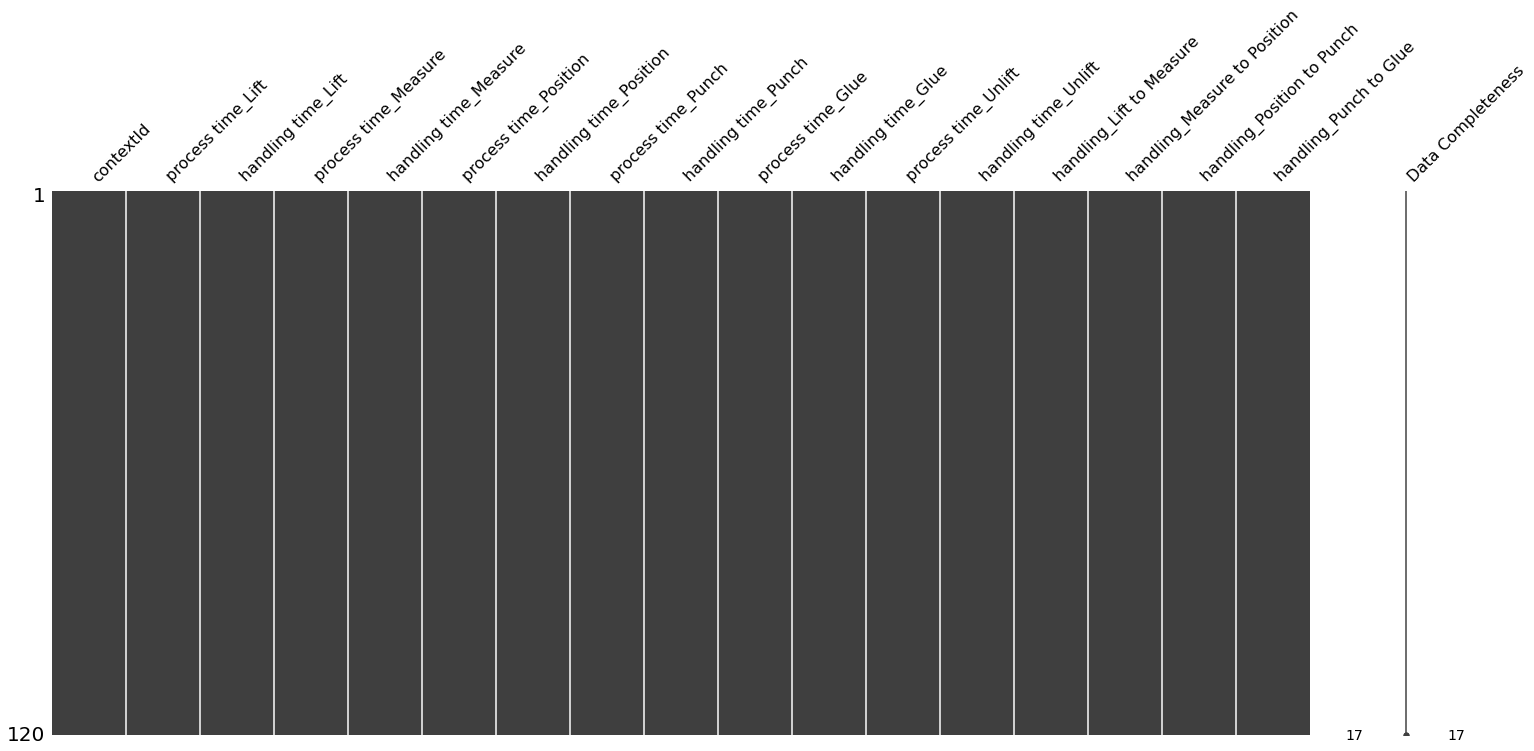

In [13]:
#Missing values
import missingno as msno

msno.matrix(dataset, labels=True, sort="descending");

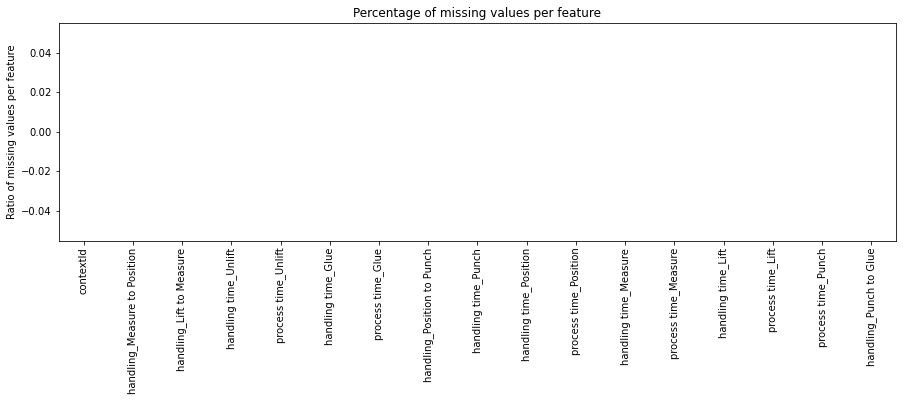

In [14]:
#ratio of missing values per feature
dataset.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [15]:
# check for missing values in variables - NaN
dataset.isnull().sum()
#We can see that there are missing values in the dataset.

contextId                       0
process time_Lift               0
handling time_Lift              0
process time_Measure            0
handling time_Measure           0
process time_Position           0
handling time_Position          0
process time_Punch              0
handling time_Punch             0
process time_Glue               0
handling time_Glue              0
process time_Unlift             0
handling time_Unlift            0
handling_Lift to Measure        0
handling_Measure to Position    0
handling_Position to Punch      0
handling_Punch to Glue          0
dtype: int64

In [16]:
print(dataset.shape)

(120, 17)


In [17]:
dataset.head()

,contextId,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,2022-11-16-12:09:16.364_9,7.340,1.10,7.490,6.61,2.26,7.640,1.17,7.370,0.49,8.020,5.80,4.080,1.1,6.61,7.640,34.509
1,2022-11-16-12:09:06.614_8,7.359,2.46,8.700,1.10,2.17,11.930,1.17,8.730,0.49,9.250,5.82,2.690,1.1,1.10,11.930,34.669
2,2022-11-16-12:08:58.085_7,7.400,1.10,7.359,1.10,2.19,7.610,1.17,12.930,0.49,7.949,5.81,3.930,1.1,1.10,7.610,40.330
3,2022-11-16-12:08:49.115_5,6.670,2.43,8.730,1.10,2.10,6.359,1.19,8.610,0.49,17.010,5.82,11.579,1.1,1.10,6.359,32.610
4,2022-11-16-12:08:29.885_4,7.330,11.01,8.810,8.87,2.10,15.500,1.17,17.119,0.49,9.410,5.82,2.720,1.1,1.10,5.670,41.019


In [18]:
# Drop first n rows
dataset = dataset.iloc[1: , :]
dataset = dataset.reset_index()
dataset=dataset.drop(['index'], axis=1)
dataset.head()

,contextId,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,2022-11-16-12:09:06.614_8,7.359,2.46,8.700,1.10,2.17,11.930,1.17,8.730,0.49,9.250,5.82,2.690,1.1,1.1,11.930,34.669
1,2022-11-16-12:08:58.085_7,7.400,1.10,7.359,1.10,2.19,7.610,1.17,12.930,0.49,7.949,5.81,3.930,1.1,1.1,7.610,40.330
2,2022-11-16-12:08:49.115_5,6.670,2.43,8.730,1.10,2.10,6.359,1.19,8.610,0.49,17.010,5.82,11.579,1.1,1.1,6.359,32.610
3,2022-11-16-12:08:29.885_4,7.330,11.01,8.810,8.87,2.10,15.500,1.17,17.119,0.49,9.410,5.82,2.720,1.1,1.1,5.670,41.019
4,2022-11-16-12:08:21.415_3,7.330,1.10,7.330,1.10,2.19,7.720,1.19,6.580,0.49,13.610,5.81,4.090,1.1,1.1,7.720,34.669


In [19]:
# check for missing values in variables - NaN
dataset.isnull().sum()

contextId                       0
process time_Lift               0
handling time_Lift              0
process time_Measure            0
handling time_Measure           0
process time_Position           0
handling time_Position          0
process time_Punch              0
handling time_Punch             0
process time_Glue               0
handling time_Glue              0
process time_Unlift             0
handling time_Unlift            0
handling_Lift to Measure        0
handling_Measure to Position    0
handling_Position to Punch      0
handling_Punch to Glue          0
dtype: int64

In [23]:
dataset_1=dataset
dataset_1.describe()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,7.300782,2.627008,8.057866,3.601176,2.200218,9.489000,1.179924,10.487017,0.466151,11.195412,5.814958,5.909723,1.382471,3.077479,8.816403,42.288899
std,0.231406,2.748884,0.672583,18.262285,0.058996,18.217759,0.009963,18.254832,0.096959,18.240465,0.011382,18.234916,1.078677,18.214297,18.165007,35.858403
min,6.530000,1.099000,7.259000,1.099000,2.020000,5.730000,1.160000,6.450000,0.080000,7.140000,5.789000,1.790000,1.099000,1.099000,5.380000,29.659000
25%,7.325000,1.100000,7.380000,1.100000,2.150000,6.324500,1.170000,7.300000,0.490000,8.014500,5.810000,2.690000,1.100000,1.100000,6.290000,34.784000
50%,7.370000,2.420000,8.560000,1.100000,2.210000,7.510000,1.180000,8.530000,0.490000,9.220000,5.810000,3.940000,1.100000,1.100000,7.470000,35.370000
75%,7.419000,2.440000,8.715000,1.100000,2.250000,7.675000,1.190000,8.693500,0.490000,9.370000,5.820000,4.050000,1.100000,1.100000,7.624500,35.584500
max,7.560000,15.459000,8.920000,199.727000,2.290000,204.877000,1.230000,205.907000,0.500000,206.597000,5.860000,201.277000,7.400000,199.727000,204.877000,234.026000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

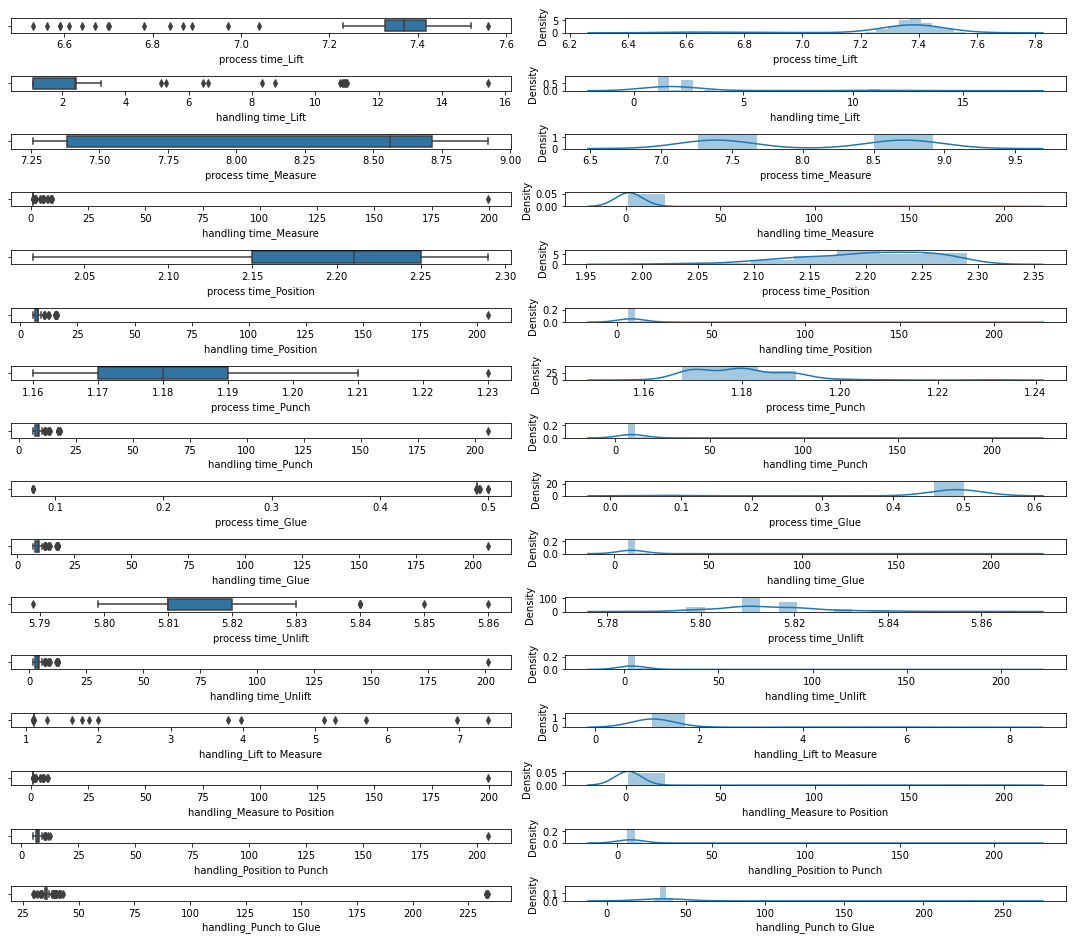

In [24]:
# check the outliers

df1=dataset_1.copy()
fig, ax = plt.subplots(16, 2, figsize = (15, 13))
sns.boxplot(x= df1["process time_Lift"], ax = ax[0,0])
sns.distplot(df1['process time_Lift'], ax = ax[0,1])
sns.boxplot(x= df1["handling time_Lift"], ax = ax[1,0])
sns.distplot(df1['handling time_Lift'], ax = ax[1,1])
sns.boxplot(x= df1["process time_Measure"], ax = ax[2,0])
sns.distplot(df1['process time_Measure'], ax = ax[2,1])
sns.boxplot(x= df1["handling time_Measure"], ax = ax[3,0])
sns.distplot(df1['handling time_Measure'], ax = ax[3,1])
sns.boxplot(x= df1["process time_Position"], ax = ax[4,0])
sns.distplot(df1['process time_Position'], ax = ax[4,1])
sns.boxplot(x= df1["handling time_Position"], ax = ax[5,0])
sns.distplot(df1['handling time_Position'], ax = ax[5,1])
sns.boxplot(x= df1["process time_Punch"], ax = ax[6,0])
sns.distplot(df1['process time_Punch'], ax = ax[6,1])
sns.boxplot(x= df1["handling time_Punch"], ax = ax[7,0])
sns.distplot(df1['handling time_Punch'], ax = ax[7,1])
sns.boxplot(x= df1["process time_Glue"], ax = ax[8,0])
sns.distplot(df1['process time_Glue'], ax = ax[8,1])
sns.boxplot(x= df1["handling time_Glue"], ax = ax[9,0])
sns.distplot(df1['handling time_Glue'], ax = ax[9,1])
sns.boxplot(x= df1["process time_Unlift"], ax = ax[10,0])
sns.distplot(df1['process time_Unlift'], ax = ax[10,1])
sns.boxplot(x= df1["handling time_Unlift"], ax = ax[11,0])
sns.distplot(df1['handling time_Unlift'], ax = ax[11,1])
sns.boxplot(x= df1["handling_Lift to Measure"], ax = ax[12,0])
sns.distplot(df1['handling_Lift to Measure'], ax = ax[12,1])
sns.boxplot(x= df1["handling_Measure to Position"], ax = ax[13,0])
sns.distplot(df1['handling_Measure to Position'], ax = ax[13,1])
sns.boxplot(x= df1["handling_Position to Punch"], ax = ax[14,0])
sns.distplot(df1['handling_Position to Punch'], ax = ax[14,1])
sns.boxplot(x= df1["handling_Punch to Glue"], ax = ax[15,0])
sns.distplot(df1['handling_Punch to Glue'], ax = ax[15,1])
plt.tight_layout()

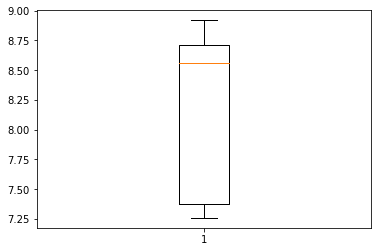

<Figure size 720x504 with 0 Axes>

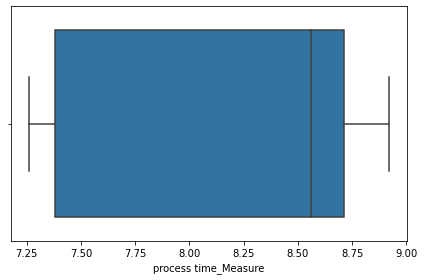

In [25]:
#Outliers check in output process time_Measure
df1=dataset_1.copy()
arr1=df1["process time_Measure"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
###############
sns.boxplot(x= df1["process time_Measure"])

plt.tight_layout()

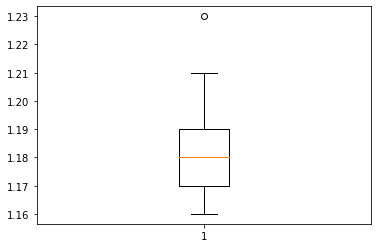

<Figure size 720x504 with 0 Axes>

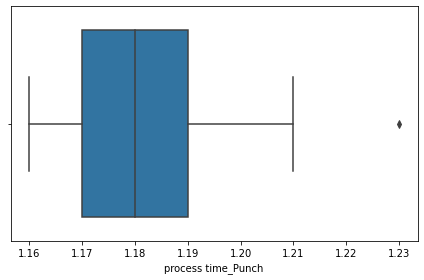

In [26]:
#Outliers check in output process time_Punch
arr1=df1["process time_Punch"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
###################

sns.boxplot(x= df1["process time_Punch"])

plt.tight_layout()

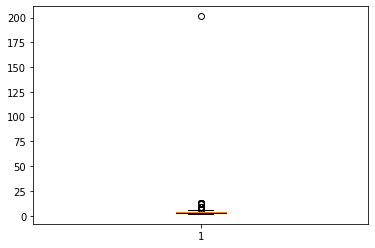

<Figure size 720x504 with 0 Axes>

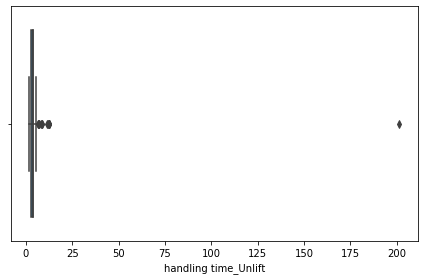

In [27]:
#Outliers check in output handling time_Unlift
arr1=df1["handling time_Unlift"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
####################
sns.boxplot(x= df1["handling time_Unlift"])

plt.tight_layout()

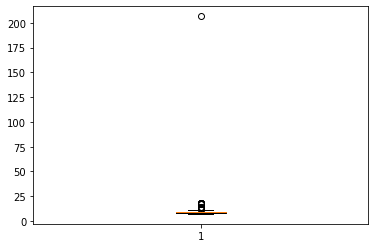

<Figure size 720x504 with 0 Axes>

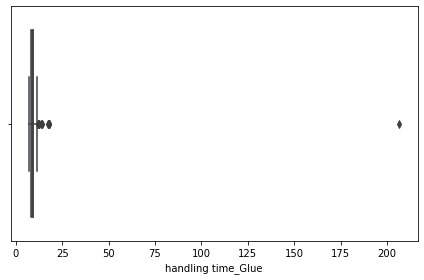

In [28]:
#Outliers check in output handling time_Glue
arr1=df1["handling time_Glue"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
####################
sns.boxplot(x= df1["handling time_Glue"])

plt.tight_layout()

In [30]:
# Position of the Outlier
handling_time_Lift=np.where(dataset_1['handling time_Lift']>3)
''' Removing the Outliers '''
#dataset_1.drop(handling_time_Lift[0], inplace = True)
dataset_1.loc[handling_time_Lift[0]]=np.nan
handling_time_Lift


(array([  3,  17,  27,  31,  43,  54,  59,  68,  73,  82,  87,  96, 101,
        110, 115], dtype=int64),)

In [33]:
w1=np.where(dataset_1['handling time_Measure']>25)
dataset_1.loc[w1[0]]=np.nan
w1

(array([61], dtype=int64),)

In [34]:
w2=np.where(dataset_1['handling time_Position']>25)
dataset_1.loc[w2[0]]=np.nan
w2

(array([62], dtype=int64),)

In [35]:
w3=np.where(dataset_1['handling time_Glue']>50)
dataset_1.loc[w3[0]]=np.nan
w3

(array([67], dtype=int64),)

In [38]:
dataset_1 = dataset_1.dropna(axis = 0)
dataset_1.shape

(101, 17)

In [39]:
dataset_1

,contextId,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,2022-11-16-12:09:06.614_8,7.359,2.460,8.700,1.100,2.170,11.930,1.170,8.730,0.49,9.250,5.820,2.690,1.100,1.100,11.930,34.669
1,2022-11-16-12:08:58.085_7,7.400,1.100,7.359,1.100,2.190,7.610,1.170,12.930,0.49,7.949,5.810,3.930,1.100,1.100,7.610,40.330
2,2022-11-16-12:08:49.115_5,6.670,2.430,8.730,1.100,2.100,6.359,1.190,8.610,0.49,17.010,5.820,11.579,1.100,1.100,6.359,32.610
4,2022-11-16-12:08:21.415_3,7.330,1.100,7.330,1.100,2.190,7.720,1.190,6.580,0.49,13.610,5.810,4.090,1.100,1.100,7.720,34.669
5,2022-11-16-12:08:11.565_2,7.419,2.430,8.660,1.100,2.240,6.190,1.180,8.730,0.49,9.310,5.800,8.300,1.100,1.100,6.190,34.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2022-11-16-11:45:40.529_130,7.400,2.000,7.470,1.100,2.270,7.870,1.180,13.509,0.49,8.100,5.800,4.049,2.000,1.100,7.870,41.189
114,2022-11-16-11:45:31.359_128,6.560,2.440,8.740,2.000,2.200,6.370,1.210,8.930,0.49,17.470,5.820,12.200,1.100,2.000,6.370,33.339
116,2022-11-16-11:45:03.939_126,7.369,1.101,7.369,1.100,2.250,7.500,1.170,6.490,0.49,14.199,5.820,3.900,1.101,1.100,7.500,35.940
117,2022-11-16-11:44:54.150_125,7.390,2.420,8.689,1.101,2.229,6.240,1.180,8.570,0.49,9.650,5.819,8.870,1.100,1.101,6.240,35.540


In [40]:
dataset_1.describe()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.291574,1.707000,7.969970,1.463307,2.200069,7.338366,1.180119,10.164228,0.461901,9.603059,5.814772,4.496733,1.122634,1.463307,7.338366,43.176168
std,0.249348,0.659802,0.671346,1.212747,0.058937,1.190059,0.009116,19.718888,0.104750,2.738712,0.011424,2.647432,0.123457,1.212747,1.190059,38.867155
min,6.530000,1.099000,7.259000,1.099000,2.020000,5.730000,1.160000,6.450000,0.080000,7.140000,5.789000,1.790000,1.099000,1.099000,5.730000,29.659000
25%,7.330000,1.100000,7.370000,1.100000,2.150000,6.310000,1.170000,7.300000,0.490000,7.990000,5.810000,2.700000,1.100000,1.100000,6.310000,34.760000
50%,7.370000,1.100000,7.450000,1.100000,2.200000,7.510000,1.180000,8.180000,0.490000,8.809000,5.810000,3.980000,1.100000,1.100000,7.510000,35.330000
75%,7.430000,2.439000,8.710000,1.100000,2.250000,7.649000,1.190000,8.630000,0.490000,9.370000,5.820000,4.060000,1.100000,1.100000,7.649000,35.540000
max,7.560000,2.460000,8.920000,7.400000,2.290000,12.599000,1.210000,205.907000,0.500000,18.020000,5.860000,12.670000,2.000000,7.400000,12.599000,234.026000


In [41]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 118
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   contextId                     101 non-null    object 
 1   process time_Lift             101 non-null    float64
 2   handling time_Lift            101 non-null    float64
 3   process time_Measure          101 non-null    float64
 4   handling time_Measure         101 non-null    float64
 5   process time_Position         101 non-null    float64
 6   handling time_Position        101 non-null    float64
 7   process time_Punch            101 non-null    float64
 8   handling time_Punch           101 non-null    float64
 9   process time_Glue             101 non-null    float64
 10  handling time_Glue            101 non-null    float64
 11  process time_Unlift           101 non-null    float64
 12  handling time_Unlift          101 non-null    float64
 13  handl

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

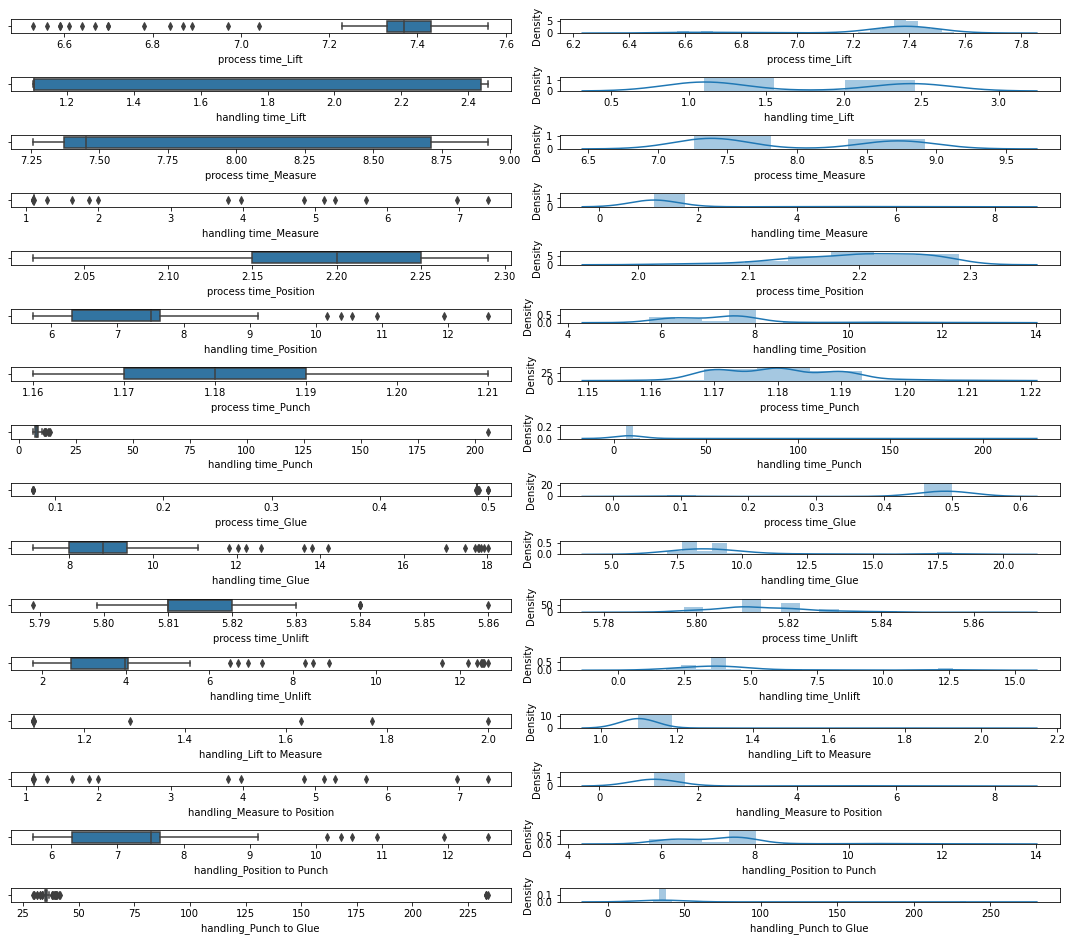

In [42]:
#Detect and Remove the Outliers

df1=dataset_1.copy()
fig, ax = plt.subplots(16, 2, figsize = (15, 13))
sns.boxplot(x= df1["process time_Lift"], ax = ax[0,0])
sns.distplot(df1['process time_Lift'], ax = ax[0,1])
sns.boxplot(x= df1["handling time_Lift"], ax = ax[1,0])
sns.distplot(df1['handling time_Lift'], ax = ax[1,1])
sns.boxplot(x= df1["process time_Measure"], ax = ax[2,0])
sns.distplot(df1['process time_Measure'], ax = ax[2,1])
sns.boxplot(x= df1["handling time_Measure"], ax = ax[3,0])
sns.distplot(df1['handling time_Measure'], ax = ax[3,1])
sns.boxplot(x= df1["process time_Position"], ax = ax[4,0])
sns.distplot(df1['process time_Position'], ax = ax[4,1])
sns.boxplot(x= df1["handling time_Position"], ax = ax[5,0])
sns.distplot(df1['handling time_Position'], ax = ax[5,1])
sns.boxplot(x= df1["process time_Punch"], ax = ax[6,0])
sns.distplot(df1['process time_Punch'], ax = ax[6,1])
sns.boxplot(x= df1["handling time_Punch"], ax = ax[7,0])
sns.distplot(df1['handling time_Punch'], ax = ax[7,1])
sns.boxplot(x= df1["process time_Glue"], ax = ax[8,0])
sns.distplot(df1['process time_Glue'], ax = ax[8,1])
sns.boxplot(x= df1["handling time_Glue"], ax = ax[9,0])
sns.distplot(df1['handling time_Glue'], ax = ax[9,1])
sns.boxplot(x= df1["process time_Unlift"], ax = ax[10,0])
sns.distplot(df1['process time_Unlift'], ax = ax[10,1])
sns.boxplot(x= df1["handling time_Unlift"], ax = ax[11,0])
sns.distplot(df1['handling time_Unlift'], ax = ax[11,1])
sns.boxplot(x= df1["handling_Lift to Measure"], ax = ax[12,0])
sns.distplot(df1['handling_Lift to Measure'], ax = ax[12,1])
sns.boxplot(x= df1["handling_Measure to Position"], ax = ax[13,0])
sns.distplot(df1['handling_Measure to Position'], ax = ax[13,1])
sns.boxplot(x= df1["handling_Position to Punch"], ax = ax[14,0])
sns.distplot(df1['handling_Position to Punch'], ax = ax[14,1])
sns.boxplot(x= df1["handling_Punch to Glue"], ax = ax[15,0])
sns.distplot(df1['handling_Punch to Glue'], ax = ax[15,1])
plt.tight_layout()

In [43]:
# After removing Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

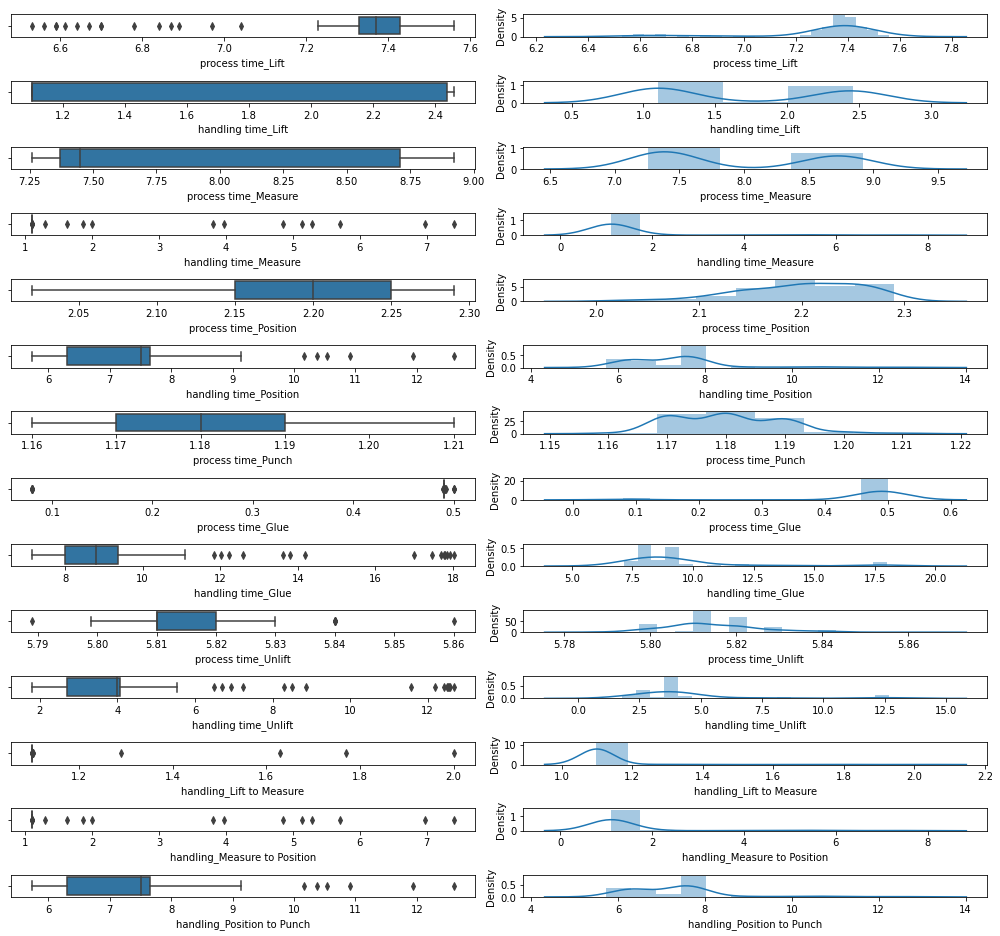

In [44]:
#Exploring the range and distribution of numerical data
#Detect and Remove the Outliers


df1=dataset_1.copy()
fig, ax = plt.subplots(14, 2, figsize = (14, 13))
sns.boxplot(x= df1["process time_Lift"], ax = ax[0,0])
sns.distplot(df1['process time_Lift'], ax = ax[0,1])
sns.boxplot(x= df1["handling time_Lift"], ax = ax[1,0])
sns.distplot(df1['handling time_Lift'], ax = ax[1,1])
sns.boxplot(x= df1["process time_Measure"], ax = ax[2,0])
sns.distplot(df1['process time_Measure'], ax = ax[2,1])
sns.boxplot(x= df1["handling time_Measure"], ax = ax[3,0])
sns.distplot(df1['handling time_Measure'], ax = ax[3,1])
sns.boxplot(x= df1["process time_Position"], ax = ax[4,0])
sns.distplot(df1['process time_Position'], ax = ax[4,1])
sns.boxplot(x= df1["handling time_Position"], ax = ax[5,0])
sns.distplot(df1['handling time_Position'], ax = ax[5,1])
sns.boxplot(x= df1["process time_Punch"], ax = ax[6,0])
sns.distplot(df1['process time_Punch'], ax = ax[6,1])
#sns.boxplot(x= df1["handling time_Punch_s"], ax = ax[7,0])
#sns.distplot(df1['handling time_Punch_s'], ax = ax[7,1])
sns.boxplot(x= df1["process time_Glue"], ax = ax[7,0])
sns.distplot(df1['process time_Glue'], ax = ax[7,1])
sns.boxplot(x= df1["handling time_Glue"], ax = ax[8,0])
sns.distplot(df1['handling time_Glue'], ax = ax[8,1])
sns.boxplot(x= df1["process time_Unlift"], ax = ax[9,0])
sns.distplot(df1['process time_Unlift'], ax = ax[9,1])
sns.boxplot(x= df1["handling time_Unlift"], ax = ax[10,0])
sns.distplot(df1['handling time_Unlift'], ax = ax[10,1])
sns.boxplot(x= df1["handling_Lift to Measure"], ax = ax[11,0])
sns.distplot(df1['handling_Lift to Measure'], ax = ax[11,1])
sns.boxplot(x= df1["handling_Measure to Position"], ax = ax[12,0])
sns.distplot(df1['handling_Measure to Position'], ax = ax[12,1])
sns.boxplot(x= df1["handling_Position to Punch"], ax = ax[13,0])
sns.distplot(df1['handling_Position to Punch'], ax = ax[13,1])
#sns.boxplot(x= df1["handling_Punch to Glue_s"], ax = ax[14,0])
#sns.distplot(df1['handling_Punch to Glue_s'], ax = ax[14,1])
plt.tight_layout()




In [45]:
# After removing Outliers

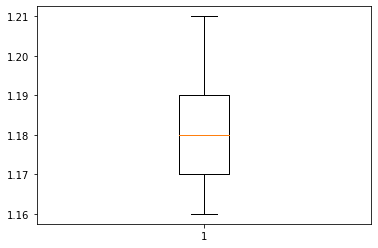

<Figure size 720x504 with 0 Axes>

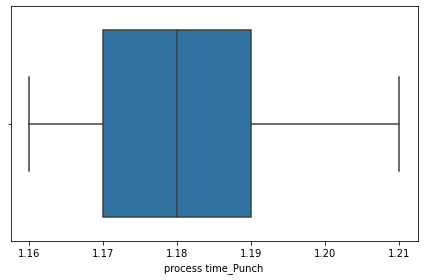

In [46]:
#Outliers check in output process time_Punch
df1=dataset_1.copy()
arr1=df1["process time_Punch"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
####################33
sns.boxplot(x= df1["process time_Punch"])

plt.tight_layout()

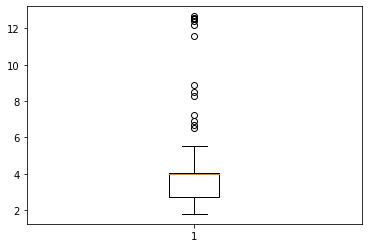

<Figure size 720x504 with 0 Axes>

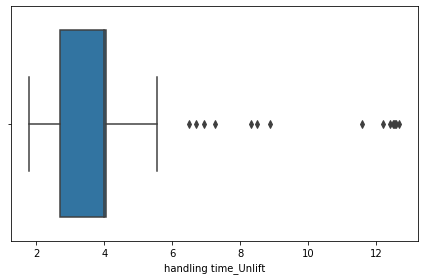

In [47]:
#Outliers check in output handling time_Unlift
arr1=df1["handling time_Unlift"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
####################33
sns.boxplot(x= df1["handling time_Unlift"])

plt.tight_layout()

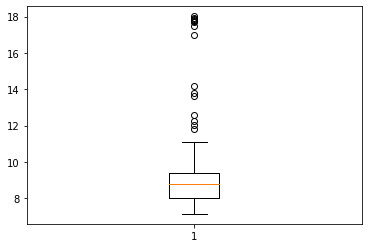

<Figure size 720x504 with 0 Axes>

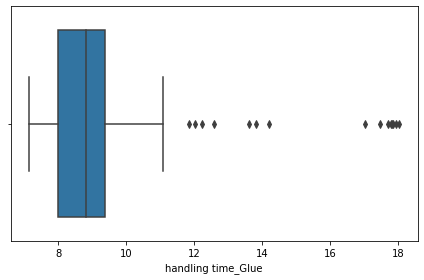

In [48]:
#Outliers check in output handling time_Glue
arr1=df1["handling time_Glue"]
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()
####################33
sns.boxplot(x= df1["handling time_Glue"])
plt.tight_layout()

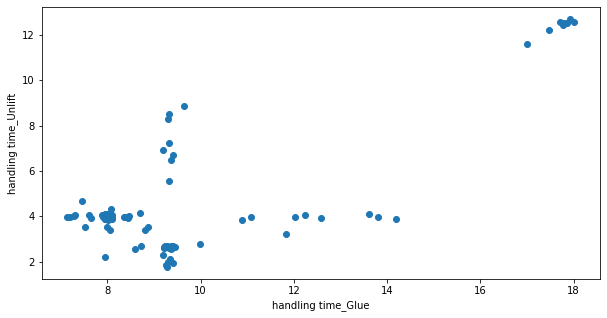

In [49]:
# Scatter plot
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df1["handling time_Glue"],df1["handling time_Unlift"])

# x-axis label
ax.set_xlabel('handling time_Glue')
 
# y-axis label
ax.set_ylabel('handling time_Unlift')
plt.show()

In [50]:
#selected fetures
dataset_14=dataset_1.drop(columns=['handling time_Punch','handling_Punch to Glue'])
dataset_14.head()

,contextId,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch
0,2022-11-16-12:09:06.614_8,7.359,2.46,8.700,1.1,2.17,11.930,1.17,0.49,9.250,5.82,2.690,1.1,1.1,11.930
1,2022-11-16-12:08:58.085_7,7.400,1.10,7.359,1.1,2.19,7.610,1.17,0.49,7.949,5.81,3.930,1.1,1.1,7.610
2,2022-11-16-12:08:49.115_5,6.670,2.43,8.730,1.1,2.10,6.359,1.19,0.49,17.010,5.82,11.579,1.1,1.1,6.359
4,2022-11-16-12:08:21.415_3,7.330,1.10,7.330,1.1,2.19,7.720,1.19,0.49,13.610,5.81,4.090,1.1,1.1,7.720
5,2022-11-16-12:08:11.565_2,7.419,2.43,8.660,1.1,2.24,6.190,1.18,0.49,9.310,5.80,8.300,1.1,1.1,6.190


In [51]:
dataset_11=dataset_1.drop(columns=['contextId'])
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(dataset_11)
rescaledX

array([[8.04854369e-01, 1.00000000e+00, 8.67549669e-01, ...,
        1.58704967e-04, 9.02605911e-01, 2.45147211e-02],
       [8.44660194e-01, 7.34753857e-04, 6.02046960e-02, ...,
        1.58704967e-04, 2.73693405e-01, 5.22148879e-02],
       [1.35922330e-01, 9.77957384e-01, 8.85611078e-01, ...,
        1.58704967e-04, 9.15708254e-02, 1.44397090e-02],
       ...,
       [8.14563107e-01, 1.46950771e-03, 6.62251656e-02, ...,
        1.58704967e-04, 2.57679429e-01, 3.07339248e-02],
       [8.34951456e-01, 9.70609846e-01, 8.60927152e-01, ...,
        3.17409935e-04, 7.42466152e-02, 2.87766616e-02],
       [9.32038835e-01, 7.34753857e-04, 7.88681517e-02, ...,
        1.58704967e-04, 2.59135245e-01, 2.83362774e-02]])

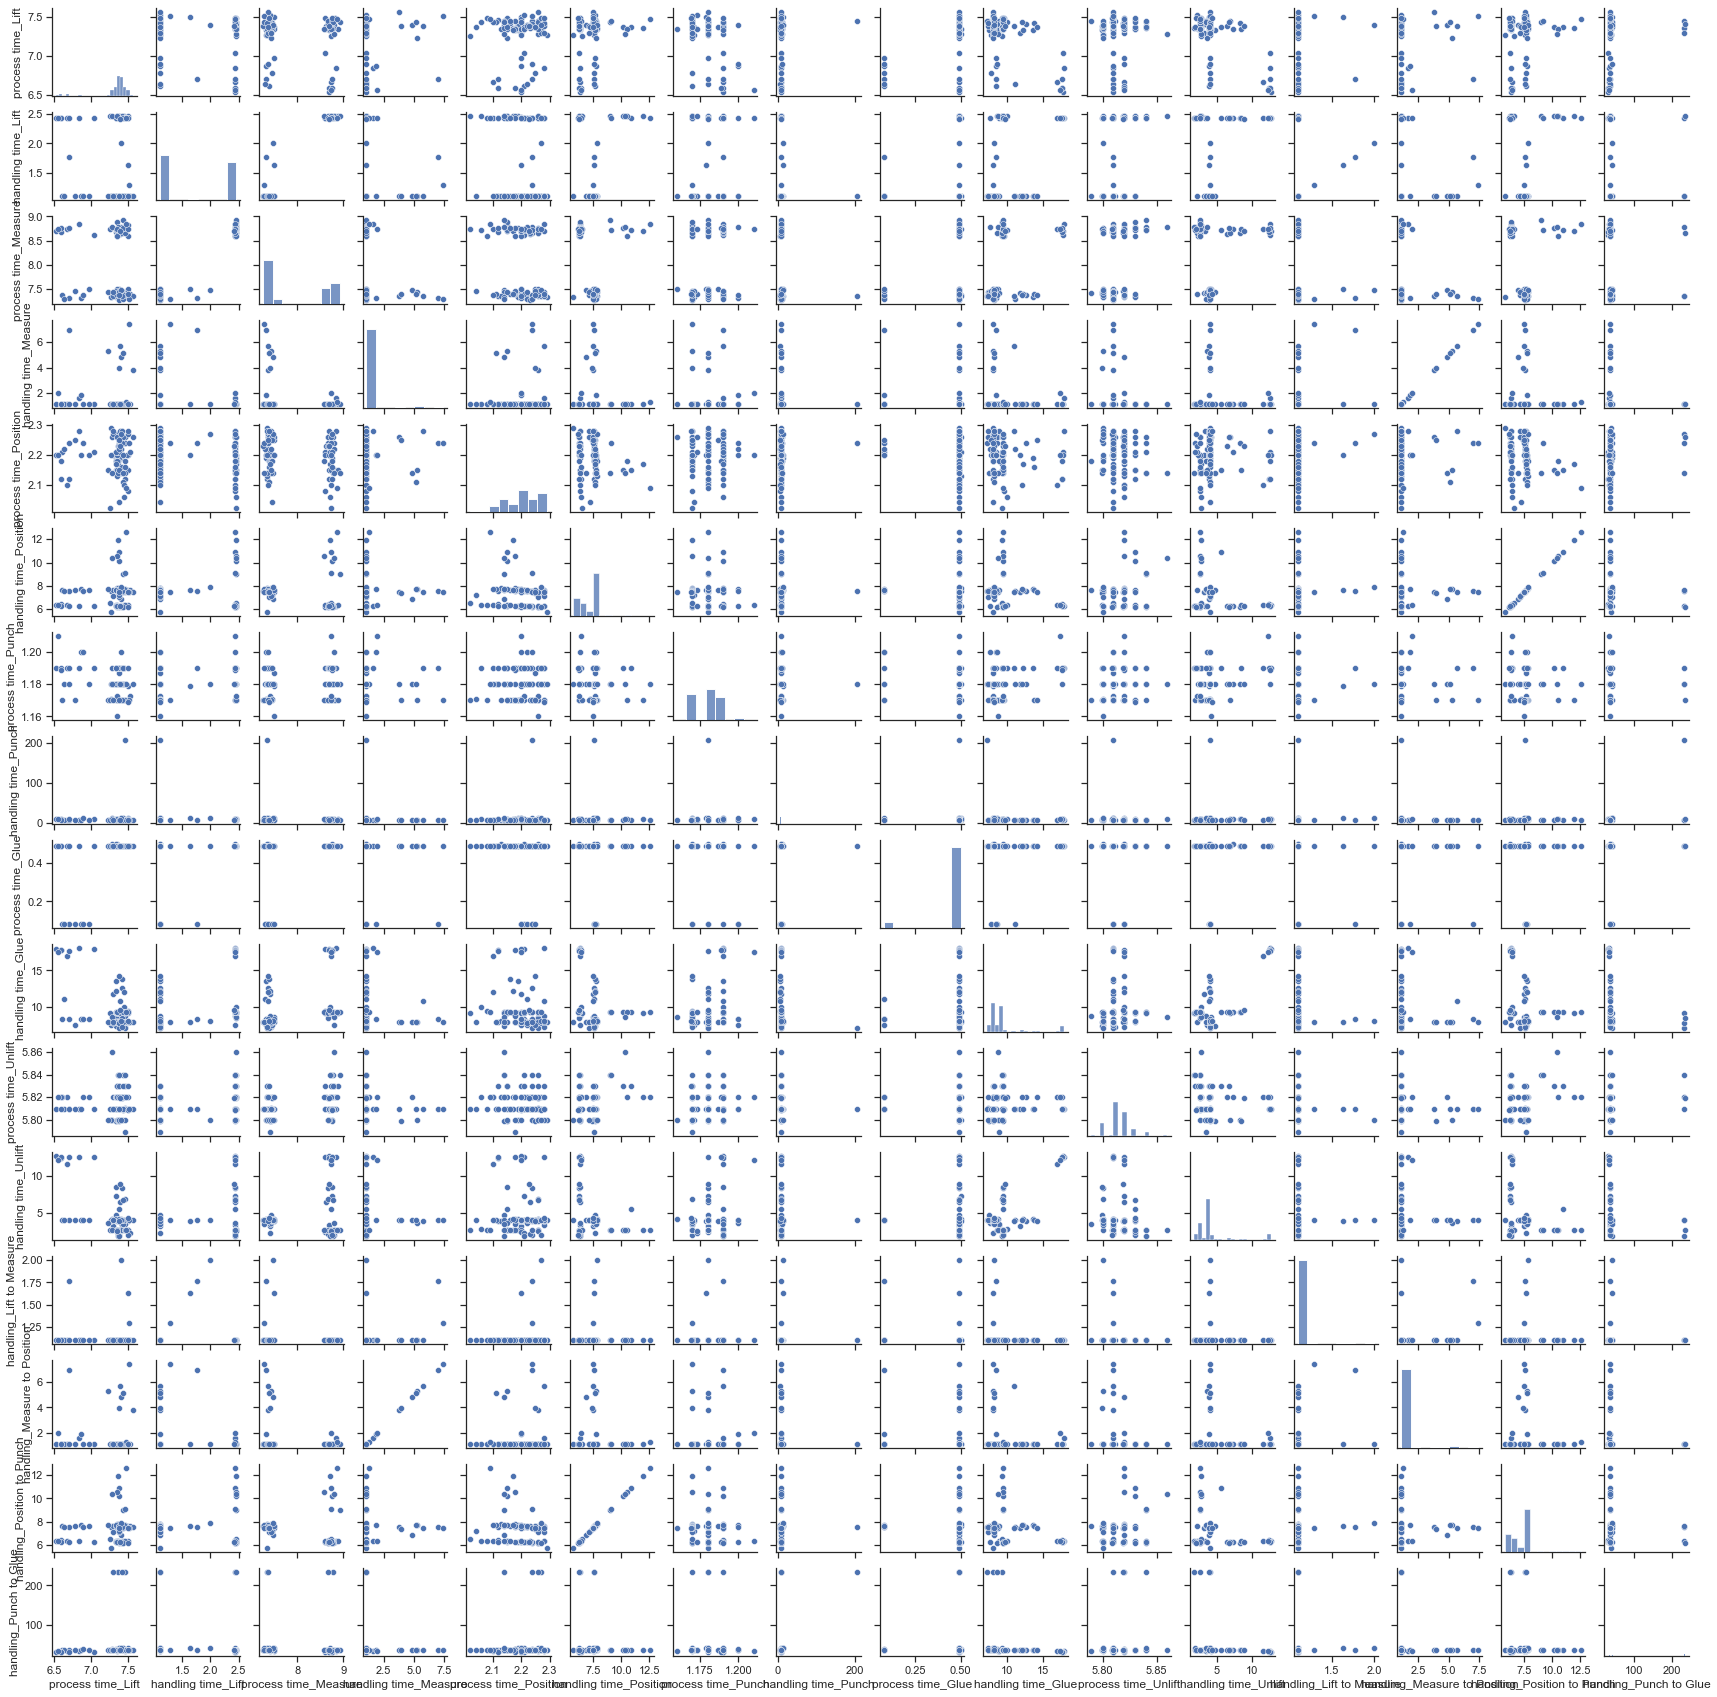

In [53]:
sns.set(style="ticks", color_codes=True)

# Create the default pairplot
sns.pairplot(dataset_1,height=1.5)

plt.show()

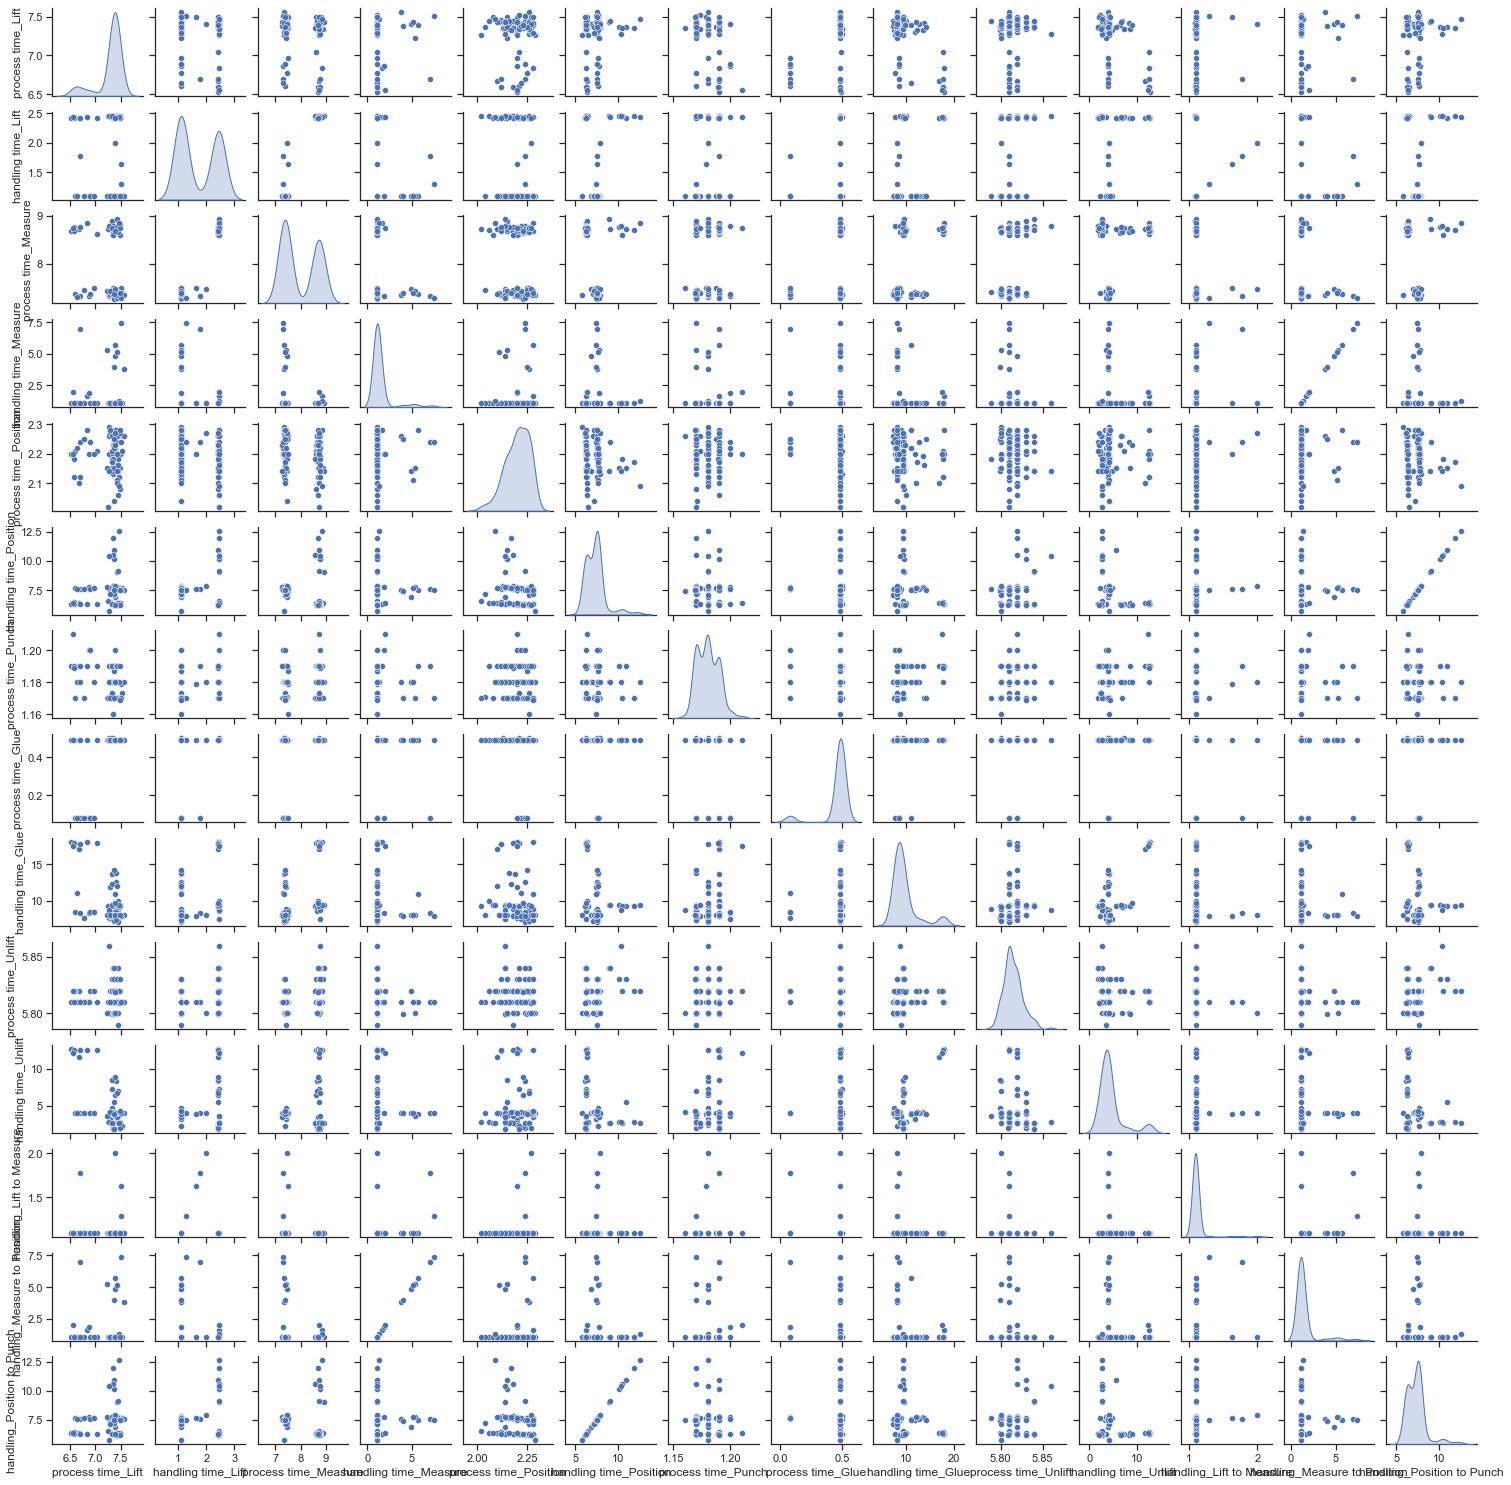

In [55]:
# selected fetures
sns.set(style="ticks", color_codes=True)

# Create the default pairplot
sns.pairplot(dataset_14,height=1.5,diag_kind="kde")
plt.show()


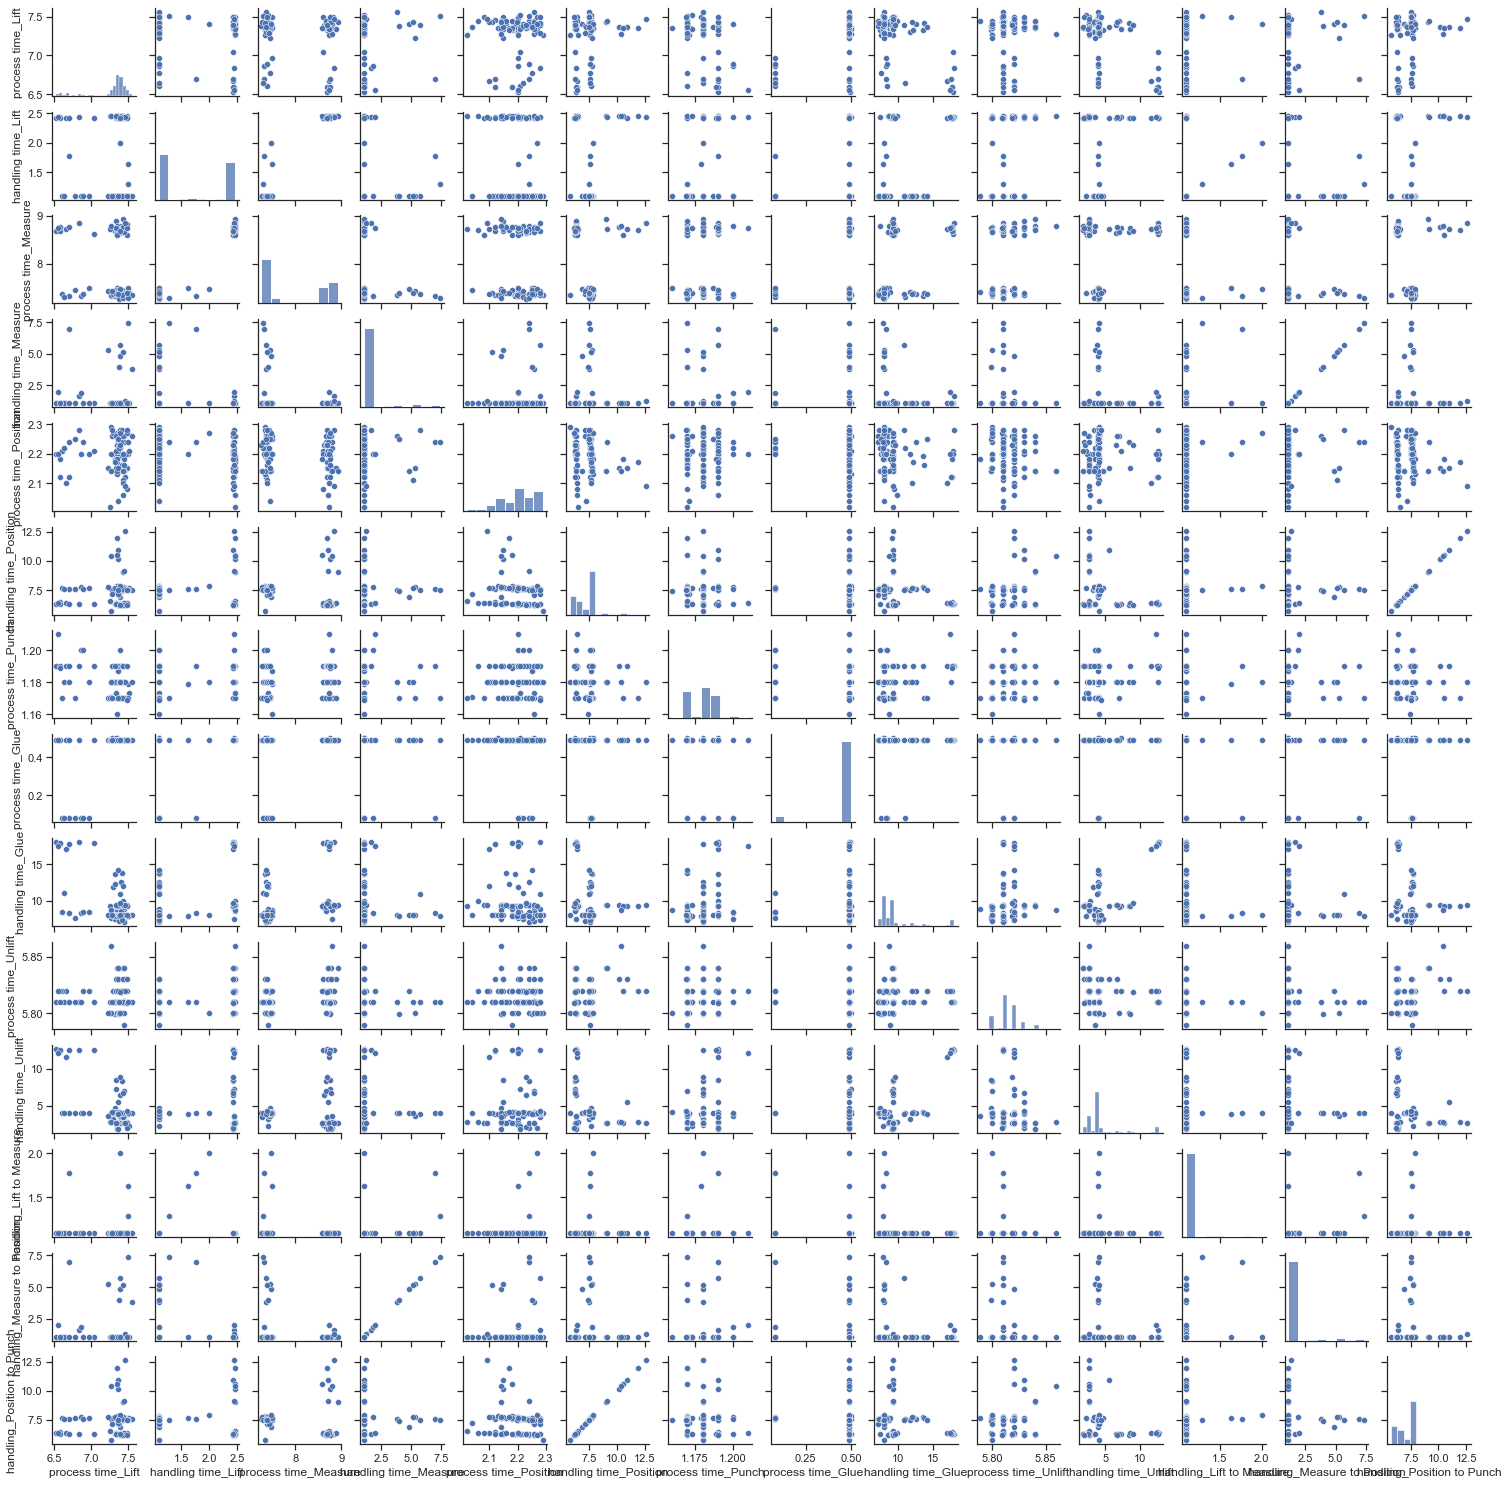

In [56]:
# selected fetures
sns.set(style="ticks", color_codes=True)
# Create the default pairplot
sns.pairplot(dataset_14,height=1.5)
plt.show()


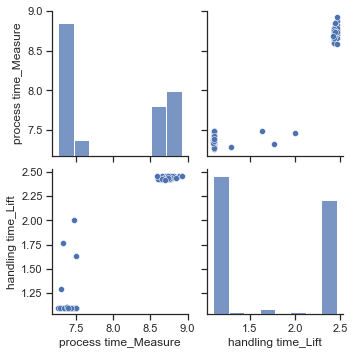

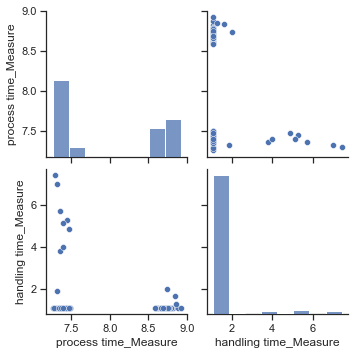

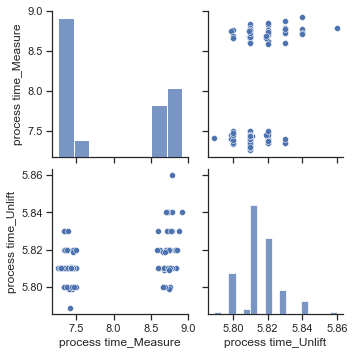

In [58]:
sns.pairplot(dataset_14, vars=["process time_Measure", "handling time_Lift"])
#sns.pairplot(dataset_1, vars=["OEE", "Egg_production"],kind='reg')

sns.pairplot(dataset_14, vars=["process time_Measure", "handling time_Measure"])

sns.pairplot(dataset_14, vars=["process time_Measure", "process time_Unlift"])
plt.show()

                              process time_Lift  handling time_Lift  \
process time_Lift                      1.000000           -0.110543   
handling time_Lift                    -0.110543            1.000000   
process time_Measure                  -0.099194            0.980205   
handling time_Measure                 -0.037921           -0.187133   
process time_Position                  0.050054           -0.192470   
handling time_Position                 0.150515           -0.182298   
process time_Punch                    -0.348231            0.129799   
handling time_Punch                    0.063369           -0.071537   
process time_Glue                      0.561879            0.211881   
handling time_Glue                    -0.615854            0.363831   
process time_Unlift                    0.028230            0.304852   
handling time_Unlift                  -0.635946            0.231359   
handling_Lift to Measure              -0.047698            0.022783   
handli

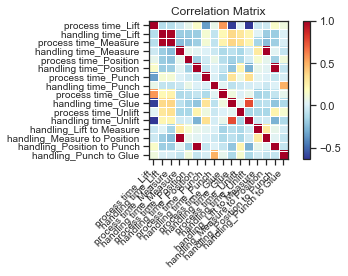

In [60]:
# create correlation matrix
# before correlation matrix need to check missing values or extreme outliers
corr = dataset_1.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()
#----output

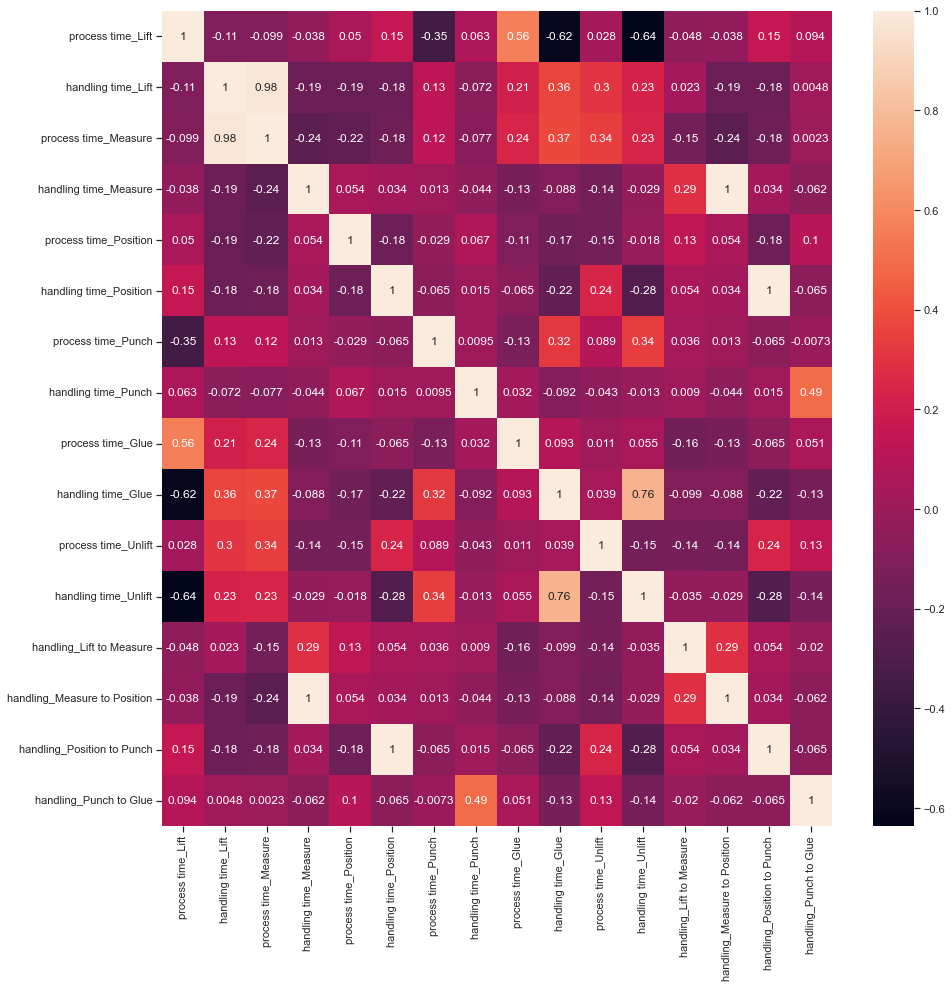

In [62]:
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True)
plt.show()

                              process time_Lift  handling time_Lift  \
process time_Lift                      1.000000           -0.110543   
handling time_Lift                    -0.110543            1.000000   
process time_Measure                  -0.099194            0.980205   
handling time_Measure                 -0.037921           -0.187133   
process time_Position                  0.050054           -0.192470   
handling time_Position                 0.150515           -0.182298   
process time_Punch                    -0.348231            0.129799   
process time_Glue                      0.561879            0.211881   
handling time_Glue                    -0.615854            0.363831   
process time_Unlift                    0.028230            0.304852   
handling time_Unlift                  -0.635946            0.231359   
handling_Lift to Measure              -0.047698            0.022783   
handling_Measure to Position          -0.037921           -0.187133   
handli

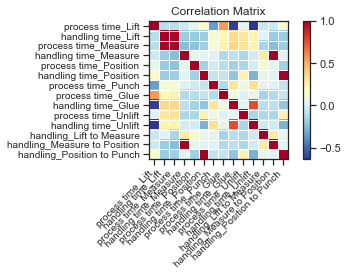

In [63]:
#selected fetures corrilation
# create correlation matrix
# before correlation matrix need to check missing values or extreme outliers
corr1 = dataset_14.corr()
print(corr1)
import statsmodels.api as sm
sm.graphics.plot_corr(corr1, xnames=list(corr1.columns))
plt.show()

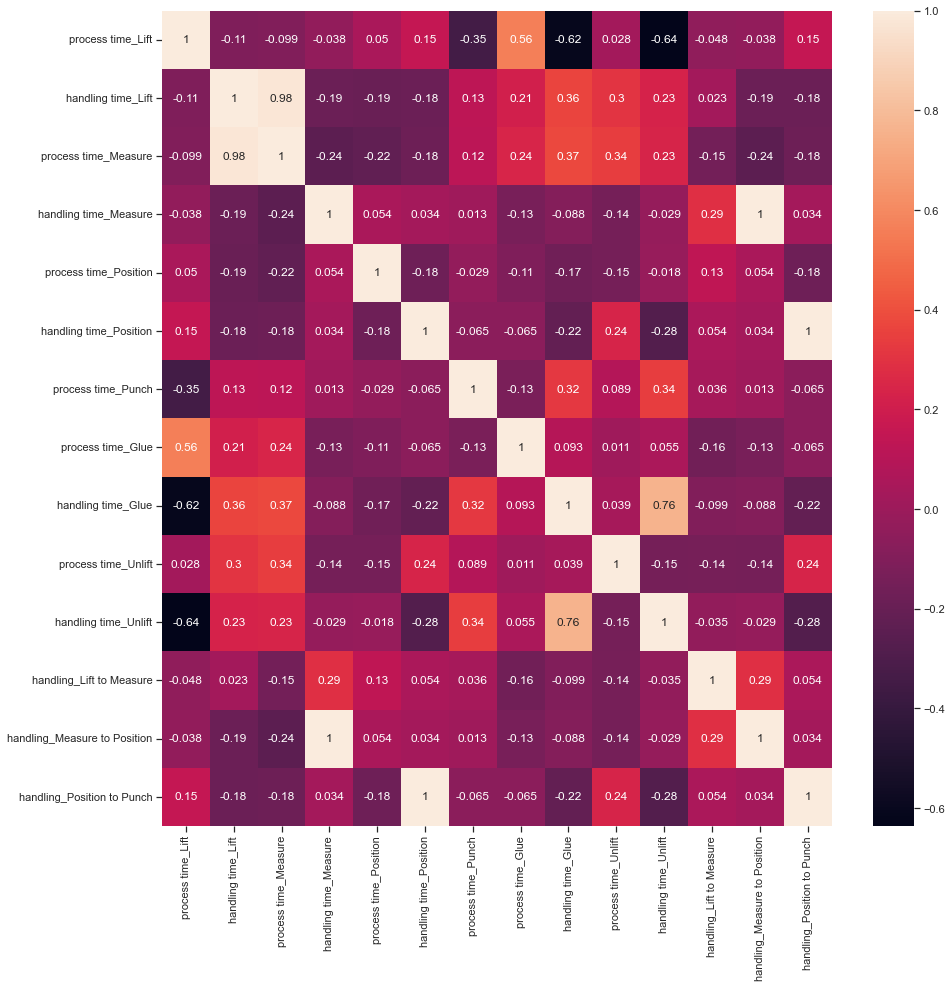

In [64]:
plt.figure(figsize = (15,15))
sns.heatmap(corr1, annot=True)
plt.show()

In [65]:
dataset_15=dataset_14.head(100)
import dataframe_image as dfi

In [66]:
# data discription
dataset_15.describe()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.289590,1.713070,7.975770,1.466940,2.199270,7.336650,1.180230,0.46162,9.618290,5.814620,4.498600,1.122860,1.466940,7.336650
std,0.249802,0.660286,0.672181,1.218304,0.058682,1.195929,0.009093,0.10524,2.748207,0.011378,2.660702,0.124058,1.218304,1.195929
min,6.530000,1.099000,7.259000,1.099000,2.020000,5.730000,1.160000,0.08000,7.140000,5.789000,1.790000,1.099000,1.099000,5.730000
25%,7.330000,1.100000,7.370000,1.100000,2.150000,6.310000,1.170000,0.49000,7.990000,5.810000,2.697500,1.100000,1.100000,6.310000
50%,7.370000,1.100000,7.460000,1.100000,2.200000,7.510000,1.180000,0.49000,8.839500,5.810000,3.975000,1.100000,1.100000,7.510000
75%,7.422500,2.439250,8.712500,1.100000,2.250000,7.649250,1.190000,0.49000,9.375000,5.820000,4.060000,1.100000,1.100000,7.649250
max,7.560000,2.460000,8.920000,7.400000,2.290000,12.599000,1.210000,0.50000,18.020000,5.860000,12.670000,2.000000,7.400000,12.599000


In [67]:
df_describe=dataset_15.describe()
#dfi.export(df_describe, 'dataset_describe.png')
#df_describe.to_csv("dataset_describe.csv")
#dataset_15.to_csv("dataset_for ML.csv")

In [68]:
dataset_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 117
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   contextId                     100 non-null    object 
 1   process time_Lift             100 non-null    float64
 2   handling time_Lift            100 non-null    float64
 3   process time_Measure          100 non-null    float64
 4   handling time_Measure         100 non-null    float64
 5   process time_Position         100 non-null    float64
 6   handling time_Position        100 non-null    float64
 7   process time_Punch            100 non-null    float64
 8   process time_Glue             100 non-null    float64
 9   handling time_Glue            100 non-null    float64
 10  process time_Unlift           100 non-null    float64
 11  handling time_Unlift          100 non-null    float64
 12  handling_Lift to Measure      100 non-null    float64
 13  handl

In [69]:
dataset_1.head()

,contextId,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,2022-11-16-12:09:06.614_8,7.359,2.46,8.700,1.1,2.17,11.930,1.17,8.73,0.49,9.250,5.82,2.690,1.1,1.1,11.930,34.669
1,2022-11-16-12:08:58.085_7,7.400,1.10,7.359,1.1,2.19,7.610,1.17,12.93,0.49,7.949,5.81,3.930,1.1,1.1,7.610,40.330
2,2022-11-16-12:08:49.115_5,6.670,2.43,8.730,1.1,2.10,6.359,1.19,8.61,0.49,17.010,5.82,11.579,1.1,1.1,6.359,32.610
4,2022-11-16-12:08:21.415_3,7.330,1.10,7.330,1.1,2.19,7.720,1.19,6.58,0.49,13.610,5.81,4.090,1.1,1.1,7.720,34.669
5,2022-11-16-12:08:11.565_2,7.419,2.43,8.660,1.1,2.24,6.190,1.18,8.73,0.49,9.310,5.80,8.300,1.1,1.1,6.190,34.789


In [70]:
dataset_1
dataset_12=dataset_1.drop(columns=['contextId'])

dataset_12.head()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,7.359,2.46,8.700,1.1,2.17,11.930,1.17,8.73,0.49,9.250,5.82,2.690,1.1,1.1,11.930,34.669
1,7.400,1.10,7.359,1.1,2.19,7.610,1.17,12.93,0.49,7.949,5.81,3.930,1.1,1.1,7.610,40.330
2,6.670,2.43,8.730,1.1,2.10,6.359,1.19,8.61,0.49,17.010,5.82,11.579,1.1,1.1,6.359,32.610
4,7.330,1.10,7.330,1.1,2.19,7.720,1.19,6.58,0.49,13.610,5.81,4.090,1.1,1.1,7.720,34.669
5,7.419,2.43,8.660,1.1,2.24,6.190,1.18,8.73,0.49,9.310,5.80,8.300,1.1,1.1,6.190,34.789


In [71]:
dataset_12.shape

(101, 16)

In [72]:
x1 = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
y1 = dataset_12.iloc[:,2:3].values 
x1

array([[ 7.359,  2.46 ,  1.1  , ...,  1.1  ,  1.1  , 11.93 ],
       [ 7.4  ,  1.1  ,  1.1  , ...,  1.1  ,  1.1  ,  7.61 ],
       [ 6.67 ,  2.43 ,  1.1  , ...,  1.1  ,  1.1  ,  6.359],
       ...,
       [ 7.369,  1.101,  1.1  , ...,  1.101,  1.1  ,  7.5  ],
       [ 7.39 ,  2.42 ,  1.101, ...,  1.1  ,  1.101,  6.24 ],
       [ 7.49 ,  1.1  ,  1.1  , ...,  1.1  ,  1.1  ,  7.51 ]])

In [74]:
##########################################################

**Multiple Linear Regression model**

In [75]:
from sklearn import linear_model
scale = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [77]:
#Defining the training and the test data

x = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
y = dataset_12.iloc[:,2:3].values 

x_train_MLR, x_test_MLR, y_train_MLR, y_test_MLR = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [78]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train_MLR, y_train_MLR)

LinearRegression()

In [79]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [1.69757729]
Coefficients:


[(array([ 7.359,  2.46 ,  1.1  ,  2.17 , 11.93 ,  1.17 ,  0.49 ,  9.25 ,
          5.82 ,  2.69 ,  1.1  ,  1.1  , 11.93 ]),
  array([ 2.58995282e-02,  9.99476214e-01, -2.10191102e-03, -5.72233716e-02,
          7.74405331e-04,  2.99977506e-01,  6.61371899e-04, -5.95346255e-03,
          9.06304517e-01,  7.71781730e-03, -9.80526595e-01, -2.10191102e-03,
          7.74405331e-04]))]

In [80]:
x_test_MLR

array([[ 7.419,  1.1  ,  1.1  ,  2.16 ,  7.68 ,  1.17 ,  0.49 , 13.799,
         5.81 ,  3.99 ,  1.1  ,  1.1  ,  7.68 ],
       [ 7.29 ,  1.1  ,  1.1  ,  2.28 ,  7.15 ,  1.17 ,  0.49 ,  8.04 ,
         5.81 ,  4.06 ,  1.1  ,  1.1  ,  7.15 ],
       [ 7.39 ,  2.42 ,  1.101,  2.229,  6.24 ,  1.18 ,  0.49 ,  9.65 ,
         5.819,  8.87 ,  1.1  ,  1.101,  6.24 ],
       [ 7.4  ,  2.   ,  1.1  ,  2.27 ,  7.87 ,  1.18 ,  0.49 ,  8.1  ,
         5.8  ,  4.049,  2.   ,  1.1  ,  7.87 ],
       [ 6.699,  2.43 ,  1.1  ,  2.12 ,  6.26 ,  1.18 ,  0.49 , 17.699,
         5.81 , 12.57 ,  1.1  ,  1.1  ,  6.26 ],
       [ 7.349,  1.1  ,  1.1  ,  2.27 ,  7.49 ,  1.19 ,  0.49 ,  8.   ,
         5.81 ,  4.03 ,  1.1  ,  1.1  ,  7.49 ],
       [ 7.48 ,  1.1  ,  1.1  ,  2.2  ,  7.64 ,  1.17 ,  0.49 ,  8.05 ,
         5.81 ,  4.   ,  1.1  ,  1.1  ,  7.64 ],
       [ 7.437,  1.1  ,  1.1  ,  2.1  ,  7.7  ,  1.18 ,  0.49 , 12.03 ,
         5.82 ,  3.99 ,  1.1  ,  1.1  ,  7.7  ],
       [ 7.39 ,  2.43 ,  1.1  , 

In [81]:
#Prediction of test set
y_pred_MLR= mlr.predict(x_test_MLR)
#Predicted values
print("Prediction for test set: {}".format(y_pred_MLR))


Prediction for test set: [[7.35980791]
 [7.38360543]
 [8.7457029 ]
 [7.39869104]
 [8.71655338]
 [7.39223849]
 [7.39334053]
 [7.38633297]
 [8.73998864]
 [8.72286511]
 [7.39240779]
 [7.40085331]
 [7.39107067]
 [8.71629192]
 [7.41752219]
 [7.39419135]
 [8.73615129]
 [8.78928172]
 [8.74554102]
 [8.75611759]
 [7.37439595]]


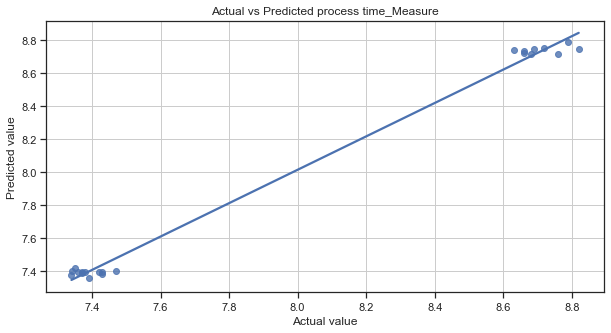

In [82]:
##Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test_MLR,y=y_pred_MLR,ci=None);
plt.title('Actual vs Predicted process time_Measure')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

In [83]:
#Evaluate the Model test
from sklearn.metrics import r2_score
MLR_Accuracy_test=r2_score(y_test_MLR,y_pred_MLR)*100
print(" Accuracy of the model_MLR_testdata %.2f" %MLR_Accuracy_test)

#Model Evaluation
from sklearn import metrics
MLR_meanAbErr_test = metrics.mean_absolute_error(y_test_MLR, y_pred_MLR)
MLR_meanSqErr_test = metrics.mean_squared_error(y_test_MLR, y_pred_MLR)
MLR_rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_MLR, y_pred_MLR))
print('Mean Absolute Error_MLR_testdata:', MLR_meanAbErr_test)
print('Mean Square Error_MLR_testdata:', MLR_meanSqErr_test)
print('Root Mean Square Error_MLR_testdata:', MLR_rootMeanSqErr_test)

 Accuracy of the model_MLR_testdata 99.38
Mean Absolute Error_MLR_testdata: 0.04532342427510753
Mean Square Error_MLR_testdata: 0.0026908940515325973
Root Mean Square Error_MLR_testdata: 0.05187382819430813


    Actual  Predicted
0    7.390   7.359808
1    7.430   7.383605
2    8.689   8.745703
3    7.470   7.398691
4    8.760   8.716553
5    7.360   7.392238
6    7.380   7.393341
7    7.370   7.386333
8    8.630   8.739989
9    8.660   8.722865
10   7.419   7.392408
11   7.341   7.400853
12   7.370   7.391071
13   8.680   8.716292
14   7.350   7.417522
15   7.430   7.394191
16   8.660   8.736151
17   8.790   8.789282
18   8.820   8.745541
19   8.720   8.756118
20   7.340   7.374396


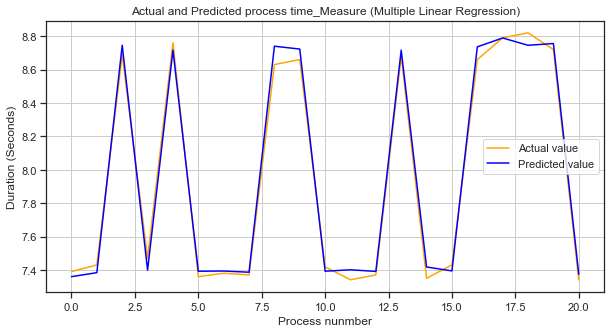

In [84]:
#Actual vs Predicted
df = pd.DataFrame(y_test_MLR, columns = ['Actual'])
df['Predicted']=pd.DataFrame(y_pred_MLR, columns = ['Predicted'])
print(df)

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Multiple Linear Regression)')
plt.plot(y_test_MLR,label='Actual value', color='orange')
plt.plot(y_pred_MLR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

Multiple Linear Regression model<br>
manual input value and see predict value

In [85]:
x_test_MLR[:1]

array([[ 7.419,  1.1  ,  1.1  ,  2.16 ,  7.68 ,  1.17 ,  0.49 , 13.799,
         5.81 ,  3.99 ,  1.1  ,  1.1  ,  7.68 ]])

In [86]:

# manual input value and see predict value
time_array1 = np.array([[7.5  , 1.63 , 1.1  , 2.2  , 7.61 , 1.179, 0.49 , 7.96 , 5.81 ,3.889, 1.63 , 1.1  , 7.61 ]])

y_pred_mlr_manual = mlr.predict(time_array1)

print(y_pred_mlr_manual)
time_array1


[[7.40623428]]


array([[7.5  , 1.63 , 1.1  , 2.2  , 7.61 , 1.179, 0.49 , 7.96 , 5.81 ,
        3.889, 1.63 , 1.1  , 7.61 ]])

**K-fold cross-validation**

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [89]:
# k-fold CV 
#lm = LinearRegression()
#mlr = LinearRegression()

R2_scores_MLR = cross_val_score(mlr, x_train_MLR, y_train_MLR, scoring='r2', cv=5)
MAE_scores_MLR = cross_val_score(mlr, x_train_MLR, y_train_MLR, scoring='neg_mean_absolute_error', cv=5)
MSE_scores_MLR = cross_val_score(mlr, x_train_MLR, y_train_MLR, scoring='neg_mean_squared_error', cv=5)
print("Cross Validation Scores: ", R2_scores_MLR)
print("Cross Validation RMSE_scores: ", MSE_scores_MLR)
print("Cross Validation MAE_scores: ", MAE_scores_MLR)

MLR_CV_R2 = R2_scores_MLR.mean()
MLR_CV_RMSE = sqrt(mean(absolute(MSE_scores_MLR)))
MLR_CV_MSE = mean(absolute(MSE_scores_MLR))
MLR_CV_MAE = mean(absolute(MAE_scores_MLR))

print("MLR_Average CV Score_R2: ", MLR_CV_R2)
print("MLR_Average CV Score_RMSE: ", MLR_CV_RMSE)
print("MLR_Average CV Score_MSE: ", MLR_CV_MSE)
print("MLR_Average CV Score_MAE: ", MLR_CV_MAE)

Cross Validation Scores:  [0.9866015  0.98626249 0.98181857 0.97920813 0.9872393 ]
Cross Validation RMSE_scores:  [-0.00590964 -0.00635223 -0.00781696 -0.0087903  -0.0057139 ]
Cross Validation MAE_scores:  [-0.05682157 -0.06190329 -0.07291632 -0.07416592 -0.05795261]
MLR_Average CV Score_R2:  0.9842259971929442
MLR_Average CV Score_RMSE:  0.08316614200517723
MLR_Average CV Score_MSE:  0.006916607176025305
MLR_Average CV Score_MAE:  0.06475194234577818


In [90]:
#training accuracy check_ MLR
y_pred_MLR_train= mlr.predict(x_train_MLR)

In [91]:
#Evaluate the Model train
MLR_Accuracy_train=r2_score(y_train_MLR,y_pred_MLR_train)*100
print(" Accuracy of the model_MLR_traindata %.2f" %MLR_Accuracy_train)

#Model Evaluation
from sklearn import metrics
MLR_meanAbErr_train = metrics.mean_absolute_error(y_train_MLR, y_pred_MLR_train)
MLR_meanSqErr_train = metrics.mean_squared_error(y_train_MLR, y_pred_MLR_train)
MLR_rootMeanSqErr_train = np.sqrt(metrics.mean_squared_error(y_train_MLR, y_pred_MLR_train))
print('Mean Absolute Error_MLR_traindata:', MLR_meanAbErr_test)
print('Mean Square Error_MLR_traindata:', MLR_meanSqErr_test)
print('Root Mean Square Error_MLR_traindata:', MLR_rootMeanSqErr_test)

 Accuracy of the model_MLR_traindata 99.12
Mean Absolute Error_MLR_traindata: 0.04532342427510753
Mean Square Error_MLR_traindata: 0.0026908940515325973
Root Mean Square Error_MLR_traindata: 0.05187382819430813


In [92]:
##################################################################

**polynomial regression**

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [95]:
#Defining the training and the test data

x11 = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
y11 = dataset_12.iloc[:,2:3].values 

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x11)
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y11, test_size = 0.2, random_state = 55)

In [96]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train_poly)

LinearRegression()

In [97]:
y_predicted_poly_reg = poly_reg_model.predict(x_test_poly)


In [98]:
#Evaluate the Model
PR_Accuracy_test=r2_score(y_test_poly,y_predicted_poly_reg)*100
print(" Accuracy of the model_PR_testdata %.2f" %PR_Accuracy_test)

#Model Evaluation
from sklearn import metrics
PR_meanAbErr_test = metrics.mean_absolute_error(y_test_poly,y_predicted_poly_reg)
PR_meanSqErr_test = metrics.mean_squared_error(y_test_poly,y_predicted_poly_reg)
PR_rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_poly,y_predicted_poly_reg))
print('Mean Absolute Error_PR_testdata:', PR_meanAbErr_test)
print('Mean Square Error_PR_testdata:', PR_meanSqErr_test)
print('Root Mean Square Error_PR_testdata:', PR_rootMeanSqErr_test)

 Accuracy of the model_PR_testdata -283237681920493.00
Mean Absolute Error_PR_testdata: 241522.70459577272
Mean Square Error_PR_testdata: 1224139401239.996
Root Mean Square Error_PR_testdata: 1106408.3338623205


Text(0, 0.5, 'mean_squared_error')

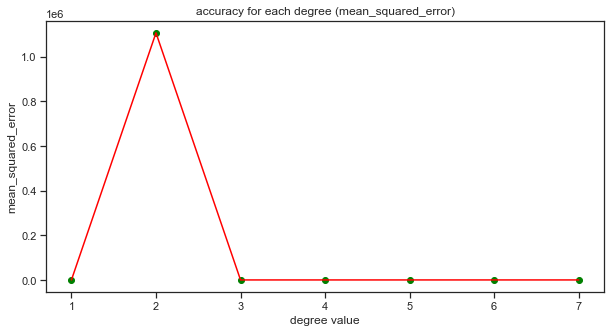

In [99]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)
  
    poly_x_values = poly_model.fit_transform(x11)
    
    x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(poly_x_values, y11, test_size = 0.2, random_state = 55)
    poly_model.fit(x_train_poly, y_train_poly)
  
    regression_model = LinearRegression()
    regression_model.fit(x_train_poly, y_train_poly)
    y_pred = regression_model.predict(x_test_poly)
  
    plt_mean_squared_error.append(mean_squared_error(y_test_poly, y_pred, squared=False))
    
plt.figure(figsize=(10, 5))  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
plt.title('accuracy for each degree (mean_squared_error)')
plt.xlabel('degree value')
plt.ylabel('mean_squared_error')

In [100]:
#######################################################

**Support Vector Regression**

In [101]:
from sklearn.svm import SVR

In [102]:
#Feature 
x1 = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
y1 = dataset_12.iloc[:,2:3].values 

In [103]:
#Defining the training and the test data
# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

sc_SVR_x = sc_x.fit_transform(x1)
sc_SVR_y = sc_y.fit_transform(y1)

# initialising the MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
#sc_SVR_x = scaler.fit_transform(x1)
#sc_SVR_y= scaler.fit_transform(y1)

#with scaling x and y
#x_train_SVR, x_test_SVR, y_train_SVR, y_test_SVR = train_test_split(sc_SVR_x, sc_SVR_y, test_size = 0.2, random_state = 70)
#without scaling y
x_train_SVR, x_test_SVR, y_train_SVR, y_test_SVR = train_test_split(x1, y1, test_size = 0.2, random_state = 55)

# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
#SVR. We have a linear condition so we can select linear 
#we select RBF(a gaussian type) kernel. 
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
#regressor = SVR(kernel='rbf')
SVregressor = SVR(kernel='linear')

SVregressor.fit(x_train_SVR,y_train_SVR)

print(SVregressor.fit(x_train_SVR,y_train_SVR))


SVR(kernel='linear')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
#5 Predicting a new result
y_pred_SVR = SVregressor.predict(x_test_SVR)

#Predicted values
print("Prediction for test set: {}".format(y_pred_SVR))

Prediction for test set: [7.43596002 7.40457012 8.68658912 7.67436766 8.70727089 7.40965662
 7.42173662 7.43875647 8.69070451 8.68912024 7.41507528 7.41078859
 7.41152316 8.69540885 7.42850273 7.41632259 8.69268567 8.74681381
 8.72171825 8.72975353 7.39163319]


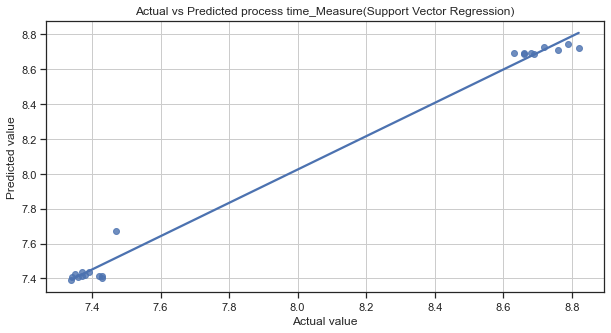

In [105]:
#Visualising the Support Vector Regression results
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test_SVR,y=y_pred_SVR,ci=None);
plt.title('Actual vs Predicted process time_Measure(Support Vector Regression)')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

    Actual  Predicted
0    7.390   7.435960
1    7.430   7.404570
2    8.689   8.686589
3    7.470   7.674368
4    8.760   8.707271
5    7.360   7.409657
6    7.380   7.421737
7    7.370   7.438756
8    8.630   8.690705
9    8.660   8.689120
10   7.419   7.415075
11   7.341   7.410789
12   7.370   7.411523
13   8.680   8.695409
14   7.350   7.428503
15   7.430   7.416323
16   8.660   8.692686
17   8.790   8.746814
18   8.820   8.721718
19   8.720   8.729754
20   7.340   7.391633


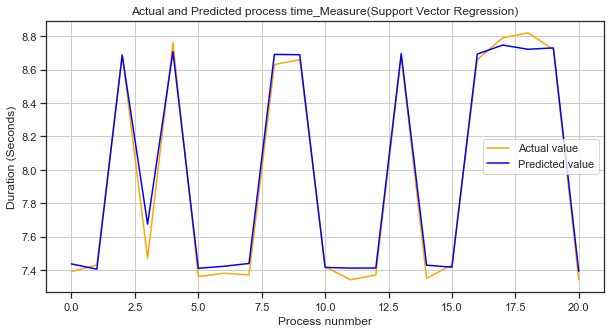

In [106]:
#Actual vs Predicted
df = pd.DataFrame(y_test_SVR, columns = ['Actual'])
df['Predicted']=pd.DataFrame(y_pred_SVR, columns = ['Predicted'])
print(df)

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure(Support Vector Regression)')
plt.plot(y_test_SVR,label='Actual value', color='orange')
plt.plot(y_pred_SVR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

In [108]:
#Evaluate the Model
SVR_Accuracy_test=r2_score(y_test_SVR,y_pred_SVR)*100
print(" Accuracy of the model _SVR_testdata %.2f" %SVR_Accuracy_test)

#Model Evaluation
from sklearn import metrics
SVR_meanAbErr_test = metrics.mean_absolute_error(y_test_SVR, y_pred_SVR)
SVR_meanSqErr_test = metrics.mean_squared_error(y_test_SVR, y_pred_SVR)
SVR_rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_SVR, y_pred_SVR))
print('Mean Absolute Error_SVR_testdata:', SVR_meanAbErr_test)
print('Mean Square Error_SVR_testdata:', SVR_meanSqErr_test)
print('Root Mean Square Error_SVR_testdata:', SVR_rootMeanSqErr_test)

 Accuracy of the model _SVR_testdata 99.02
Mean Absolute Error_SVR_testdata: 0.0494875152455892
Mean Square Error_SVR_testdata: 0.00425383543559221
Root Mean Square Error_SVR_testdata: 0.06522143386642316


In [109]:
#K-fold cross-validation
# k-fold CV 
#SVregressor = SVR(kernel='linear')

R2_scores_SVR = cross_val_score(SVregressor, x_train_MLR, y_train_SVR, scoring='r2', cv=5)
MAE_scores_SVR = cross_val_score(SVregressor, x_train_MLR, y_train_SVR, scoring='neg_mean_absolute_error', cv=5)
MSE_scores_SVR = cross_val_score(SVregressor, x_train_MLR, y_train_SVR, scoring='neg_mean_squared_error', cv=5)
print("Cross Validation Scores: ", R2_scores_SVR)
print("Cross Validation RMSE_scores: ", MSE_scores_SVR)
print("Cross Validation MAE_scores: ", MAE_scores_SVR)

SVR_CV_R2 = R2_scores_SVR.mean()
SVR_CV_RMSE = sqrt(mean(absolute(MSE_scores_SVR)))
SVR_CV_MSE = mean(absolute(MSE_scores_SVR))
SVR_CV_MAE = mean(absolute(MAE_scores_SVR))

print("SVR_Average CV Score_R2: ", SVR_CV_R2)
print("SVR_Average CV Score_RMSE: ", SVR_CV_RMSE)
print("SVR_Average CV Score_MSE: ", SVR_CV_MSE)
print("SVR_Average CV Score_MAE: ", SVR_CV_MAE)

Cross Validation Scores:  [0.98515184 0.96691068 0.97644975 0.9724719  0.98595197]
Cross Validation RMSE_scores:  [-0.00654904 -0.01530052 -0.01012524 -0.01163822 -0.00629033]
Cross Validation MAE_scores:  [-0.06415888 -0.0868302  -0.083407   -0.07746888 -0.06062046]
SVR_Average CV Score_R2:  0.9773872265912334
SVR_Average CV Score_RMSE:  0.09990330375377847
SVR_Average CV Score_MSE:  0.009980670100919728
SVR_Average CV Score_MAE:  0.07449708542260652


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [111]:
##########################################################

**Decision_Tree_Regression**

In [113]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [114]:
dataset_12.head()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,7.359,2.46,8.700,1.1,2.17,11.930,1.17,8.73,0.49,9.250,5.82,2.690,1.1,1.1,11.930,34.669
1,7.400,1.10,7.359,1.1,2.19,7.610,1.17,12.93,0.49,7.949,5.81,3.930,1.1,1.1,7.610,40.330
2,6.670,2.43,8.730,1.1,2.10,6.359,1.19,8.61,0.49,17.010,5.82,11.579,1.1,1.1,6.359,32.610
4,7.330,1.10,7.330,1.1,2.19,7.720,1.19,6.58,0.49,13.610,5.81,4.090,1.1,1.1,7.720,34.669
5,7.419,2.43,8.660,1.1,2.24,6.190,1.18,8.73,0.49,9.310,5.80,8.300,1.1,1.1,6.190,34.789


In [115]:
## Features
x2 = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
y2 = dataset_12.iloc[:,2:3].values 

In [116]:
#Defining the training and the test data
# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

sc_DTR_x = sc_x.fit_transform(x2)
sc_DTR_y = sc_y.fit_transform(y2)

# Splitting the dataset into training and testing set (80/20)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

#with scaling x and y
#x_train_DTR, x_test_DTR, y_train_DTR, y_test_DTR = train_test_split(sc_DTR_x, sc_DTR_y, test_size = 0.2, random_state = 100)
#without scaling y
x_train_DTR, x_test_DTR, y_train_DTR, y_test_DTR = train_test_split(x2, y2, test_size = 0.2, random_state = 55)


# Initializing the Decision Tree Regression model
DTRmodel = DecisionTreeRegressor(max_depth=14, random_state = 100)

# Fitting the Decision Tree Regression model to the data
DTRmodel.fit(x_train_DTR,y_train_DTR)

#print(DTRmodel.fit(x_train_DTR,y_train_DTR))


DecisionTreeRegressor(max_depth=14, random_state=100)

In [118]:
# Predicting the target values of the test set
y_pred_DTR = DTRmodel.predict(x_test_DTR)

#Predicted values
print("Prediction for test set: {}".format(y_pred_DTR))

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_DTR, y_pred_DTR)), '.3f'))
print("\nRMSE: ", rmse)

Prediction for test set: [7.4   7.47  8.599 7.39  8.599 7.449 7.34  7.4   8.599 8.6   7.35  7.43
 7.45  8.76  7.259 7.45  8.599 8.92  8.66  8.749 7.47 ]

RMSE:  0.086


In [119]:
#Evaluate the Model
DTR_Accuracy_test=r2_score(y_test_DTR,y_pred_DTR)*100
print(" Accuracy of the model_DTR_testdata %.2f" %DTR_Accuracy_test)

#Model Evaluation
from sklearn import metrics
DTR_meanAbErr_test = metrics.mean_absolute_error(y_test_DTR, y_pred_DTR)
DTR_meanSqErr_test = metrics.mean_squared_error(y_test_DTR, y_pred_DTR)
DTR_rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_DTR, y_pred_DTR))
print('Mean Absolute Error_DTR_testdata:', DTR_meanAbErr_test)
print('Mean Square Error_DTR_testdata:', DTR_meanSqErr_test)
print('Root Mean Square Error_DTR_testdata:', DTR_rootMeanSqErr_test)

 Accuracy of the model_DTR_testdata 98.29
Mean Absolute Error_DTR_testdata: 0.07476190476190486
Mean Square Error_DTR_testdata: 0.007391809523809527
Root Mean Square Error_DTR_testdata: 0.08597563331438465


In [120]:
#K-fold cross-validation
# k-fold CV 

R2_scores_DTR = cross_val_score(DTRmodel, x_train_MLR, y_train_DTR, scoring='r2', cv=5)
MAE_scores_DTR = cross_val_score(DTRmodel, x_train_MLR, y_train_DTR, scoring='neg_mean_absolute_error', cv=5)
MSE_scores_DTR = cross_val_score(DTRmodel, x_train_MLR, y_train_DTR, scoring='neg_mean_squared_error', cv=5)
print("Cross Validation Scores: ", R2_scores_DTR)
print("Cross Validation RMSE_scores: ", MSE_scores_DTR)
print("Cross Validation MAE_scores: ", MAE_scores_DTR)

DTR_CV_R2 = R2_scores_DTR.mean()
DTR_CV_RMSE = sqrt(mean(absolute(MSE_scores_DTR)))
DTR_CV_MSE = mean(absolute(MSE_scores_DTR))
DTR_CV_MAE = mean(absolute(MAE_scores_DTR))

print("SVR_Average CV Score_R2: ", DTR_CV_R2)
print("SVR_Average CV Score_RMSE: ", DTR_CV_RMSE)
print("SVR_Average CV Score_MSE: ", DTR_CV_MSE)
print("SVR_Average CV Score_MAE: ", DTR_CV_MAE)

Cross Validation Scores:  [0.97516989 0.97644047 0.97266971 0.97431781 0.97253005]
Cross Validation RMSE_scores:  [-0.01095175 -0.01089394 -0.01175044 -0.01085781 -0.01230031]
Cross Validation MAE_scores:  [-0.087     -0.0870625 -0.0905625 -0.0869375 -0.0974375]
SVR_Average CV Score_R2:  0.9742255850835937
SVR_Average CV Score_RMSE:  0.10654036793628974
SVR_Average CV Score_MSE:  0.011350849999999996
SVR_Average CV Score_MAE:  0.08979999999999995


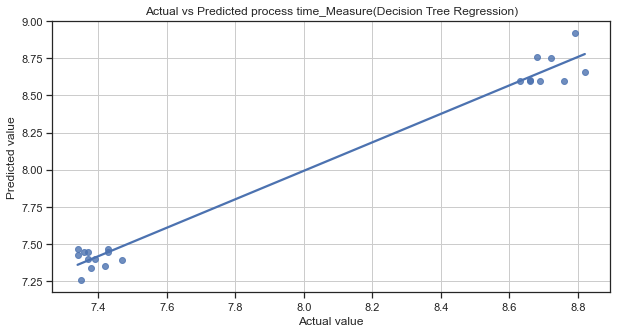

In [121]:
#Visualising the Support Vector Regression results
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test_DTR,y=y_pred_DTR,ci=None);
plt.title('Actual vs Predicted process time_Measure(Decision Tree Regression)')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()



    Actual  Predicted
0    7.390      7.400
1    7.430      7.470
2    8.689      8.599
3    7.470      7.390
4    8.760      8.599
5    7.360      7.449
6    7.380      7.340
7    7.370      7.400
8    8.630      8.599
9    8.660      8.600
10   7.419      7.350
11   7.341      7.430
12   7.370      7.450
13   8.680      8.760
14   7.350      7.259
15   7.430      7.450
16   8.660      8.599
17   8.790      8.920
18   8.820      8.660
19   8.720      8.749
20   7.340      7.470


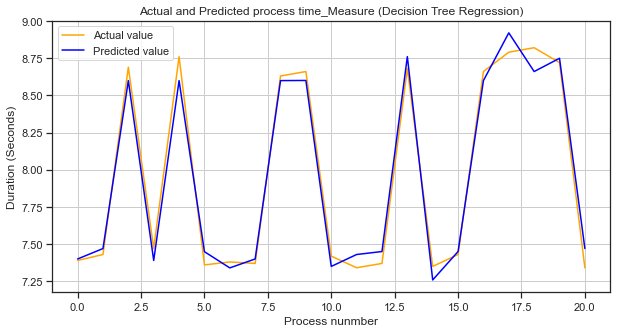

In [122]:
#Actual vs Predicted
#df=pd.DataFrame({'Actual':y_test_DT, 'Predicted':y_pred_DTR})
df = pd.DataFrame(y_test_DTR, columns = ['Actual'])
df['Predicted']=pd.DataFrame(y_pred_DTR, columns = ['Predicted'])
print(df)

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Decision Tree Regression)')
plt.plot(y_test_DTR,label='Actual value', color='orange')
plt.plot(y_pred_DTR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

In [124]:
dataset_12.head()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
0,7.359,2.46,8.700,1.1,2.17,11.930,1.17,8.73,0.49,9.250,5.82,2.690,1.1,1.1,11.930,34.669
1,7.400,1.10,7.359,1.1,2.19,7.610,1.17,12.93,0.49,7.949,5.81,3.930,1.1,1.1,7.610,40.330
2,6.670,2.43,8.730,1.1,2.10,6.359,1.19,8.61,0.49,17.010,5.82,11.579,1.1,1.1,6.359,32.610
4,7.330,1.10,7.330,1.1,2.19,7.720,1.19,6.58,0.49,13.610,5.81,4.090,1.1,1.1,7.720,34.669
5,7.419,2.43,8.660,1.1,2.24,6.190,1.18,8.73,0.49,9.310,5.80,8.300,1.1,1.1,6.190,34.789


In [125]:
# without 'handling time_Measure_s','handling time_Position_s
x2 = dataset_12.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15]].values

x21 = dataset_12[['process time_Lift', 'handling time_Lift','handling time_Measure', 'process time_Position',
                  'handling time_Position','process time_Punch','handling time_Punch','process time_Glue',
               'handling time_Glue','process time_Unlift','handling time_Unlift','handling_Lift to Measure',
               'handling_Measure to Position','handling_Position to Punch','handling_Punch to Glue']]

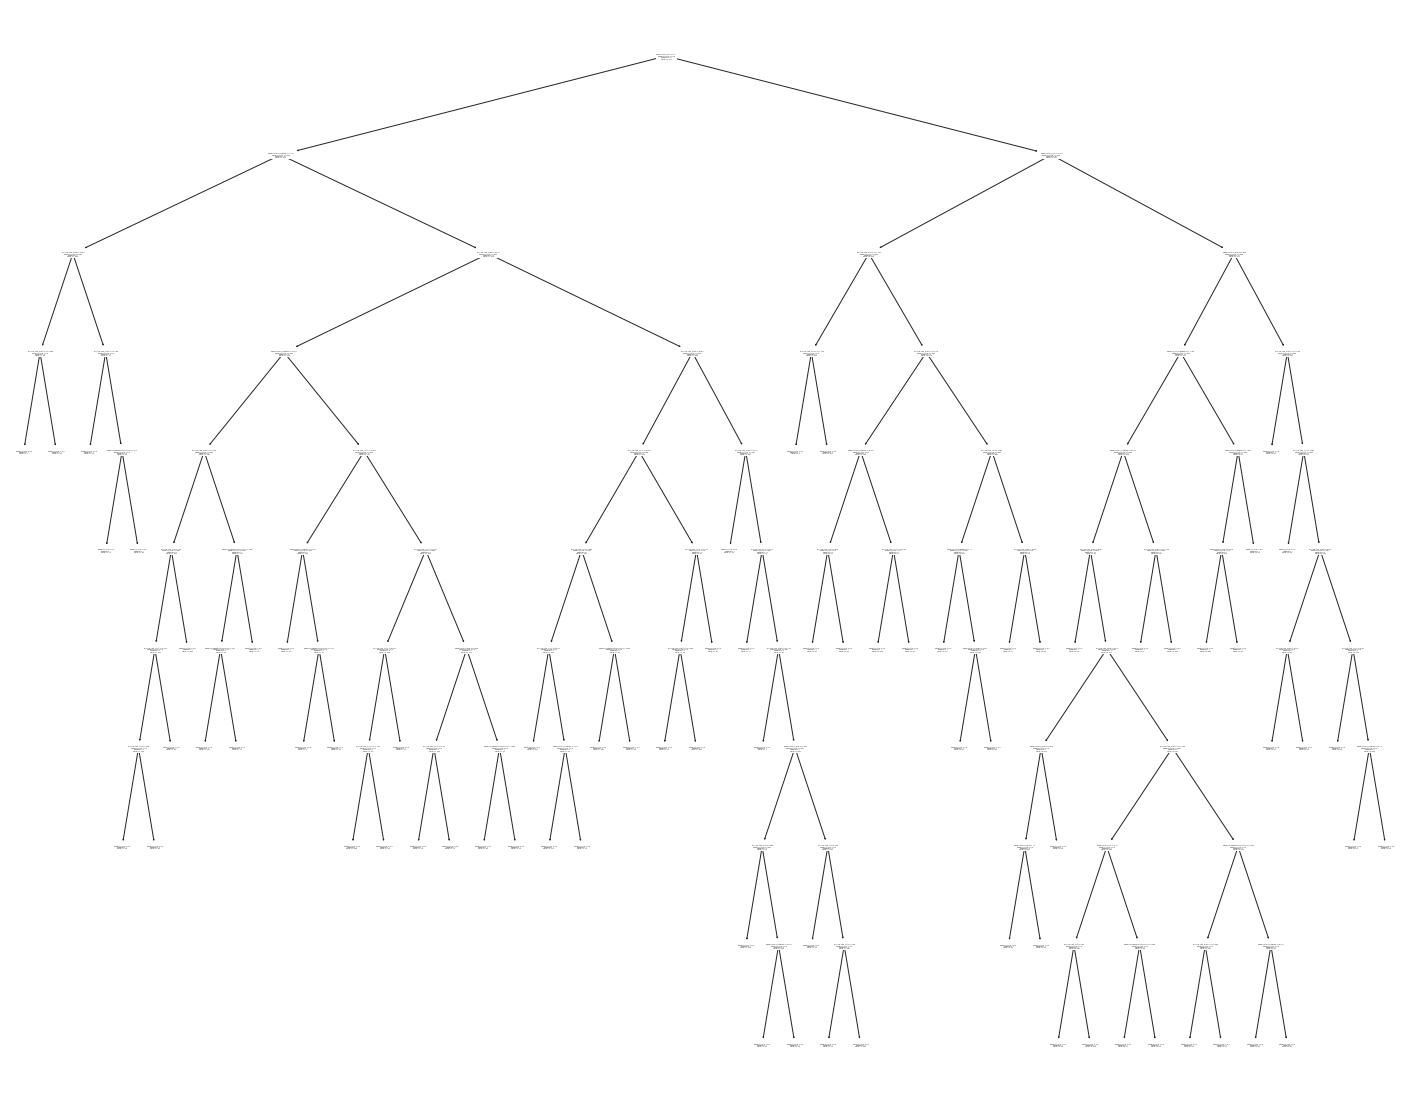

In [126]:

from sklearn.tree import plot_tree
#plt.figure(figsize=(25,20), dpi=150)
plt.figure(figsize=(25,20))

plot_tree(DTRmodel, feature_names=x21.columns);

In [130]:
##############################################

**Random forest regression**

In [132]:
from sklearn.ensemble import RandomForestRegressor # for building the model

In [133]:
## Features

x3 = dataset_12.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values
#Target
y3 = dataset_12.iloc[:,2:3].values 
x3

array([[ 7.359,  2.46 ,  1.1  , ...,  1.1  ,  1.1  , 11.93 ],
       [ 7.4  ,  1.1  ,  1.1  , ...,  1.1  ,  1.1  ,  7.61 ],
       [ 6.67 ,  2.43 ,  1.1  , ...,  1.1  ,  1.1  ,  6.359],
       ...,
       [ 7.369,  1.101,  1.1  , ...,  1.101,  1.1  ,  7.5  ],
       [ 7.39 ,  2.42 ,  1.101, ...,  1.1  ,  1.101,  6.24 ],
       [ 7.49 ,  1.1  ,  1.1  , ...,  1.1  ,  1.1  ,  7.51 ]])

In [134]:
boundaries = [(dataset_12.iloc[0].min(), dataset_12.iloc[0].max())]
boundaries

[(0.49, 34.669)]

In [135]:
#Defining the training and the test data
# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

sc_DTR_x = sc_x.fit_transform(x2)
sc_DTR_y = sc_y.fit_transform(y2)

# Splitting the dataset into training and testing set (80/20)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

#with scaling x and y
#x_train_DTR, x_test_DTR, y_train_DTR, y_test_DTR = train_test_split(sc_DTR_x, sc_DTR_y, test_size = 0.2, random_state = 100)
#without scaling y
x_train_RFR, x_test_RFR, y_train_RFR, y_test_RFR = train_test_split(x3, y3, test_size = 0.2, random_state = 55)

# Initializing the Random Forest Regression model with 10 decision trees
RFmodel = RandomForestRegressor(n_estimators = 10,max_depth=10, random_state = 55)
#rfr = RandomForestRegressor(n_estimators=20, # 20 trees
                            #max_depth=3, # 4 levels
                            #random_state=SEED)

# Fitting the Random Forest Regression model to the data
RFmodel.fit(x_train_RFR, y_train_RFR)

#print(model.fit(x_train_DTR,y_train_DTR))


C:\Temp\ipykernel_12788\166904318.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFmodel.fit(x_train_RFR, y_train_RFR)


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=55)

In [136]:
# Predicting the target values of the test set
y_pred_RFR = RFmodel.predict(x_test_RFR)

#Predicted values
print("Prediction for test set: {}".format(y_pred_RFR))

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_RFR, y_pred_RFR)), '.3f'))
print("\nRMSE: ", rmse)

Prediction for test set: [7.39112857 7.40512857 8.69915    7.667      8.7181     7.3859
 7.34802857 7.38012857 8.70915    8.6929     7.37679524 7.3899
 7.38179524 8.747      7.33012857 7.36669524 8.72725    8.7969
 8.747      8.7449     7.40922857]

RMSE:  0.061


In [137]:
#Evaluate the Model
RFR_Accuracy_test=r2_score(y_test_RFR, y_pred_RFR)*100
print(" Accuracy of the model_RFR_testdata %.2f" %RFR_Accuracy_test)

#Model Evaluation
from sklearn import metrics
RFR_meanAbErr_test = metrics.mean_absolute_error(y_test_RFR, y_pred_RFR)
RFR_meanSqErr_test = metrics.mean_squared_error(y_test_RFR, y_pred_RFR)
RFR_rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_RFR, y_pred_RFR))
print('Mean Absolute Error_RFR_testdata:', RFR_meanAbErr_test)
print('Mean Square Error_RFR_testdata:', RFR_meanSqErr_test)
print('Root Mean Square Error_RFR_testdata:', RFR_rootMeanSqErr_test)

 Accuracy of the model_RFR_testdata 99.13
Mean Absolute Error_RFR_testdata: 0.045212131519274154
Mean Square Error_RFR_testdata: 0.003759281931486864
Root Mean Square Error_RFR_testdata: 0.061312983384327856


In [138]:
#training accuracy check_ MLR
y_pred_RFR_train= RFmodel.predict(x_train_RFR)

#Evaluate the Model train
RFR_Accuracy_train=r2_score(y_train_RFR,y_pred_RFR_train)*100
print(" Accuracy of the model_MLR_traindata %.2f" %MLR_Accuracy_train)

#Model Evaluation
RFR_meanAbErr_train = metrics.mean_absolute_error(y_train_RFR, y_pred_RFR_train)
RFR_meanSqErr_train = metrics.mean_squared_error(y_train_RFR, y_pred_RFR_train)
RFR_rootMeanSqErr_train = np.sqrt(metrics.mean_squared_error(y_train_RFR, y_pred_RFR_train))
#print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error_RFR_traindata:', RFR_meanAbErr_test)
print('Mean Square Error_RFR_traindata:', RFR_meanSqErr_test)
print('Root Mean Square Error_RFR_traindata:', RFR_rootMeanSqErr_test)

 Accuracy of the model_MLR_traindata 99.12
Mean Absolute Error_RFR_traindata: 0.045212131519274154
Mean Square Error_RFR_traindata: 0.003759281931486864
Root Mean Square Error_RFR_traindata: 0.061312983384327856


In [139]:
#K-fold cross-validation
# k-fold CV 
R2_scores_RFR = cross_val_score(RFmodel, x_train_MLR, y_train_RFR, scoring='r2', cv=5)
MAE_scores_RFR = cross_val_score(RFmodel, x_train_MLR, y_train_RFR, scoring='neg_mean_absolute_error', cv=5)
MSE_scores_RFR = cross_val_score(RFmodel, x_train_MLR, y_train_RFR, scoring='neg_mean_squared_error', cv=5)
print("Cross Validation Scores: ", R2_scores_RFR)
print("Cross Validation RMSE_scores: ", MSE_scores_RFR)
print("Cross Validation MAE_scores: ", MAE_scores_RFR)

RFR_CV_R2 = R2_scores_RFR.mean()
RFR_CV_RMSE = sqrt(mean(absolute(MSE_scores_RFR)))
RFR_CV_MSE = mean(absolute(MSE_scores_RFR))
RFR_CV_MAE = mean(absolute(MAE_scores_RFR))

print("RFR_Average CV Score_R2: ", RFR_CV_R2)
print("RFR_Average CV Score_RMSE: ", RFR_CV_RMSE)
print("RFR_Average CV Score_MSE: ", RFR_CV_MSE)
print("RFR_Average CV Score_MAE: ", RFR_CV_MAE)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross Validation Scores:  [0.98710195 0.96077631 0.97803691 0.98472832 0.98790775]
Cross Validation RMSE_scores:  [-0.00568891 -0.01813706 -0.00944285 -0.0064565  -0.00541459]
Cross Validation MAE_scores:  [-0.05955969 -0.08910625 -0.07540804 -0.06518125 -0.0599625 ]
RFR_Average CV Score_R2:  0.9797102476629963
RFR_Average CV Score_RMSE:  0.09501568526993341
RFR_Average CV Score_MSE:  0.00902798044731504
RFR_Average CV Score_MAE:  0.06984354464285703


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


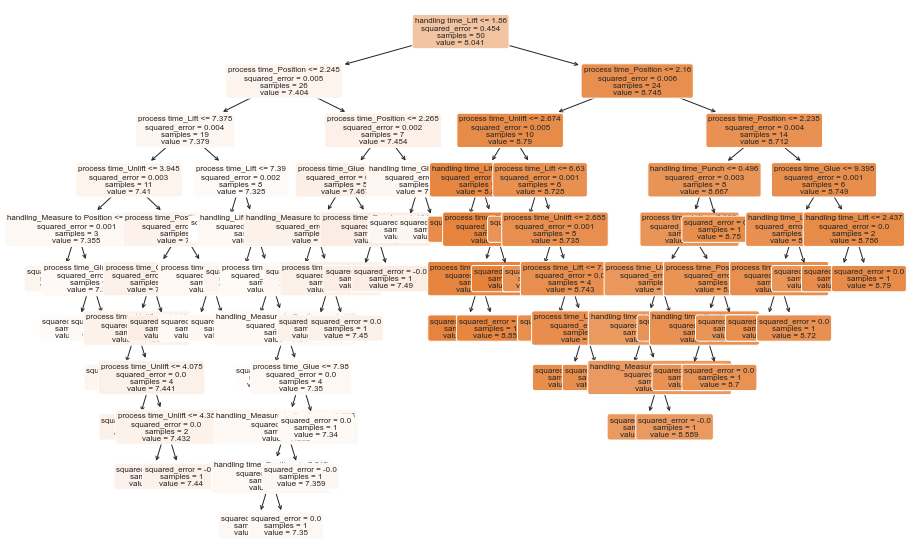

In [140]:
from sklearn import tree

features = x21.columns
# Obtain just the first tree
first_tree = RFmodel.estimators_[0]

plt.figure(figsize=(15,10))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8, 
               filled=True, 
               rounded=True);

    Actual  Predicted
0    7.390   7.391129
1    7.430   7.405129
2    8.689   8.699150
3    7.470   7.667000
4    8.760   8.718100
5    7.360   7.385900
6    7.380   7.348029
7    7.370   7.380129
8    8.630   8.709150
9    8.660   8.692900
10   7.419   7.376795
11   7.341   7.389900
12   7.370   7.381795
13   8.680   8.747000
14   7.350   7.330129
15   7.430   7.366695
16   8.660   8.727250
17   8.790   8.796900
18   8.820   8.747000
19   8.720   8.744900
20   7.340   7.409229


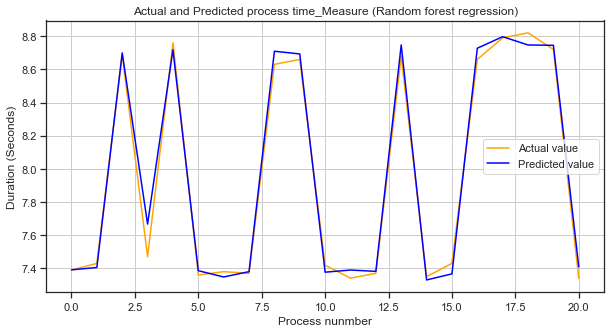

In [141]:
#Actual vs Predicted
#df=pd.DataFrame({'Actual':y_test_DT, 'Predicted':y_pred_DTR})
df1 = pd.DataFrame(y_test_RFR, columns = ['Actual'])
df1['Predicted']=pd.DataFrame(y_pred_RFR, columns = ['Predicted'])
print(df1)

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Random forest regression)')
plt.plot(y_test_RFR,label='Actual value', color='orange')
plt.plot(y_pred_RFR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

In [142]:
##########################################

**Machine learning_Model Evaluation**

all model Actual and Predicted time

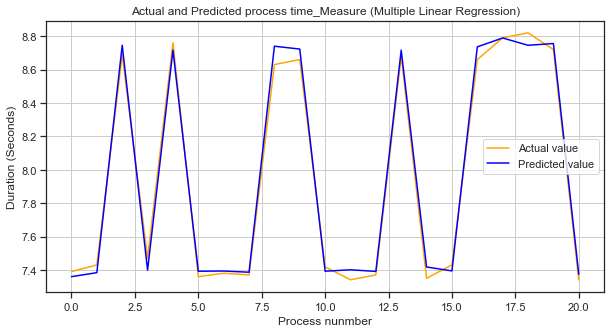

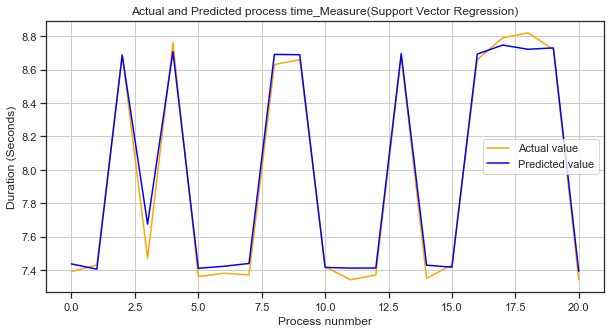

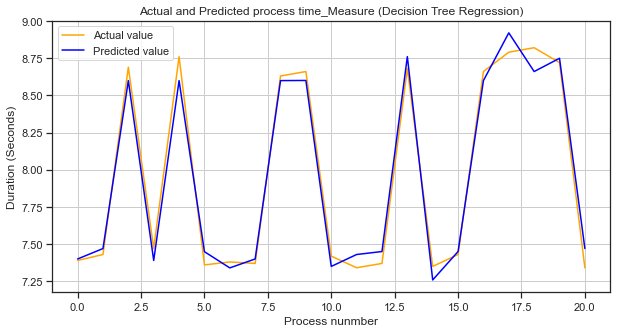

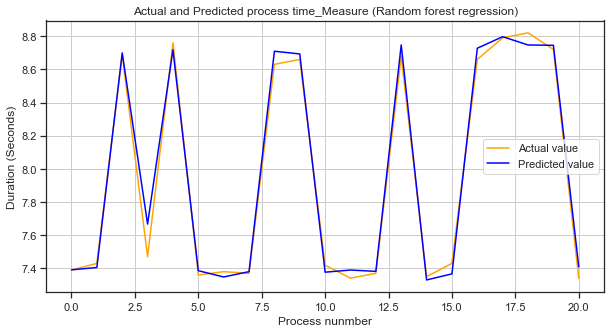

In [143]:
# all model Actual and Predicted time
plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Multiple Linear Regression)')
plt.plot(y_test_MLR,label='Actual value', color='orange')
plt.plot(y_pred_MLR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure(Support Vector Regression)')
plt.plot(y_test_SVR,label='Actual value', color='orange')
plt.plot(y_pred_SVR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Decision Tree Regression)')
plt.plot(y_test_DTR,label='Actual value', color='orange')
plt.plot(y_pred_DTR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Actual and Predicted process time_Measure (Random forest regression)')
plt.plot(y_test_RFR,label='Actual value', color='orange')
plt.plot(y_pred_RFR,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

ML Models Accuray testing data

In [144]:
# ML Models Accuray testing data
from tabulate import tabulate
data = {'ML': ['MLR', 'SVR', 'DT', 'RF'], 
        'Accuracy': [MLR_Accuracy_test, SVR_Accuracy_test, DTR_Accuracy_test, RFR_Accuracy_test],
        'MAE': [MLR_meanAbErr_test, SVR_meanAbErr_test, DTR_meanAbErr_test, RFR_meanAbErr_test],
        'MSE': [MLR_meanSqErr_test, SVR_meanSqErr_test, DTR_meanSqErr_test, RFR_meanSqErr_test],
        'RMSE': [MLR_rootMeanSqErr_test, SVR_rootMeanSqErr_test, DTR_rootMeanSqErr_test, RFR_rootMeanSqErr_test],}
 
# Create DataFrame
df3 = pd.DataFrame(data)
 
# Print the output.
df3
print('Testing data score')
print(tabulate(df3, headers = 'keys', tablefmt = 'psql'))


Testing data score
+----+------+------------+-----------+------------+-----------+
|    | ML   |   Accuracy |       MAE |        MSE |      RMSE |
|----+------+------------+-----------+------------+-----------|
|  0 | MLR  |    99.3774 | 0.0453234 | 0.00269089 | 0.0518738 |
|  1 | SVR  |    99.0158 | 0.0494875 | 0.00425384 | 0.0652214 |
|  2 | DT   |    98.2897 | 0.0747619 | 0.00739181 | 0.0859756 |
|  3 | RF   |    99.1302 | 0.0452121 | 0.00375928 | 0.061313  |
+----+------+------------+-----------+------------+-----------+


ML Models Accuray Cross validation_traning data

In [145]:
# ML Models Accuray Cross validation_traning data
from tabulate import tabulate
data_cv = {'ML': ['MLR', 'SVR', 'DT', 'RF'], 
        'Accuracy': [MLR_CV_R2, SVR_CV_R2, DTR_CV_R2, RFR_CV_R2],
        'MAE': [MLR_CV_MAE, SVR_CV_MAE, DTR_CV_MAE, RFR_CV_MAE],
        'MSE': [MLR_CV_MSE, SVR_CV_MSE, DTR_CV_MSE, RFR_CV_MSE],
        'RMSE': [MLR_CV_RMSE, SVR_CV_RMSE, DTR_CV_RMSE, RFR_CV_RMSE],}
 
# Create DataFrame
df_cv = pd.DataFrame(data_cv)
 
# Print the output.
df_cv
print('Cross validation score')
print(tabulate(df_cv, headers = 'keys', tablefmt = 'psql'))

Cross validation score
+----+------+------------+-----------+------------+-----------+
|    | ML   |   Accuracy |       MAE |        MSE |      RMSE |
|----+------+------------+-----------+------------+-----------|
|  0 | MLR  |   0.984226 | 0.0647519 | 0.00691661 | 0.0831661 |
|  1 | SVR  |   0.977387 | 0.0744971 | 0.00998067 | 0.0999033 |
|  2 | DT   |   0.974226 | 0.0898    | 0.0113508  | 0.10654   |
|  3 | RF   |   0.97971  | 0.0698435 | 0.00902798 | 0.0950157 |
+----+------+------------+-----------+------------+-----------+


MLR outperforms other models in predicting test data, but this alone does not prove that it is the best model. A more thorough examination should be performed by predicting previously unseen data. Cross validation was performed on this model to assess the generalization ability of both techniques. A good model has a cross validation error that is marginally greater than its testing error. Table shows that the cross validation result for MLR has the lowest error when compared to the other three models.

In [150]:
#####################################################

**Predicting the target values of the new data set**

In [153]:
dataset_new=dataset_13.iloc[140:160]
dataset_new.head()
dataset_new.to_csv("dataset_new for test ML.csv")

In [154]:
# view summary of dataset
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 149 to 213
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   contextId                     20 non-null     object 
 1   process time_Lift             20 non-null     float64
 2   handling time_Lift            20 non-null     float64
 3   process time_Measure          20 non-null     float64
 4   handling time_Measure         20 non-null     float64
 5   process time_Position         20 non-null     float64
 6   handling time_Position        20 non-null     float64
 7   process time_Punch            20 non-null     float64
 8   handling time_Punch           20 non-null     float64
 9   process time_Glue             20 non-null     float64
 10  handling time_Glue            20 non-null     float64
 11  process time_Unlift           20 non-null     float64
 12  handling time_Unlift          20 non-null     float64
 13  hand

In [155]:
dataset_new.describe()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,7.250450,2.474750,8.041850,1.769450,2.217450,7.349400,1.178000,8.610400,0.449000,9.326300,5.81190,4.040450,1.379450,1.379450,6.86140,35.594400
std,0.302418,2.531697,0.695442,2.091648,0.071558,1.980118,0.021423,2.393193,0.126195,2.375338,0.00938,2.384288,1.249974,1.249974,0.71802,1.927806
min,6.350000,1.100000,7.310000,1.099000,2.080000,6.129000,1.160000,6.620000,0.080000,7.310000,5.80000,1.989000,1.099000,1.099000,5.54000,31.779000
25%,7.317500,1.100000,7.359750,1.100000,2.170000,6.287500,1.170000,7.267500,0.490000,8.022500,5.80675,2.662500,1.100000,1.100000,6.25500,35.094000
50%,7.345000,1.760000,8.050000,1.100000,2.254500,7.145000,1.175000,8.245000,0.490000,8.930000,5.81000,3.895000,1.100000,1.100000,6.67000,35.354500
75%,7.372500,2.435000,8.690000,1.100000,2.272500,7.617500,1.180000,8.699250,0.490000,9.289250,5.82000,4.017500,1.100000,1.100000,7.55000,35.564250
max,7.530000,10.969000,8.860000,8.900000,2.290000,15.300000,1.260000,17.100000,0.490000,17.830000,5.83000,12.550000,6.690000,6.690000,7.71000,40.969000


In [156]:

dataset_new=dataset_new.drop(columns=['contextId'])
dataset_new.head()

,process time_Lift,handling time_Lift,process time_Measure,handling time_Measure,process time_Position,handling time_Position,process time_Punch,handling time_Punch,process time_Glue,handling time_Glue,process time_Unlift,handling time_Unlift,handling_Lift to Measure,handling_Measure to Position,handling_Position to Punch,handling_Punch to Glue
149,7.36,8.017,8.679,1.10,2.080,6.37,1.18,8.69,0.49,9.249,5.810,2.67,6.69,1.10,6.37,35.500
150,6.69,1.100,7.360,6.69,2.259,7.52,1.19,7.26,0.08,8.420,5.819,3.92,1.10,6.69,7.52,35.440
152,7.33,1.100,7.420,1.10,2.280,6.86,1.18,12.87,0.49,8.000,5.810,4.01,1.10,1.10,6.86,40.969
153,6.70,2.430,8.660,1.10,2.080,6.44,1.19,7.95,0.49,17.830,5.810,12.55,1.10,1.10,6.44,31.779
154,7.36,10.969,8.769,8.90,2.260,15.30,1.18,17.10,0.49,9.289,5.810,2.64,1.10,1.10,5.54,40.290


In [157]:
dataset_new.shape

(20, 16)

In [158]:
## Features
#dataset_new=dataset_12.iloc[50:70]
x_test_new = dataset_new.iloc[:, [0,1,3,4,5,6,8,9,10,11,12,13,14]].values

y_test_new = dataset_new.iloc[:,2:3].values 
y_test_new


array([[8.679],
       [7.36 ],
       [7.42 ],
       [8.66 ],
       [8.769],
       [7.36 ],
       [8.86 ],
       [7.5  ],
       [8.68 ],
       [7.34 ],
       [8.6  ],
       [7.31 ],
       [8.72 ],
       [7.32 ],
       [8.77 ],
       [7.33 ],
       [8.67 ],
       [7.359],
       [7.37 ],
       [8.76 ]])

In [163]:
####################################################

Multiple Linear Regression model- new data for validation

In [164]:
# Predicting the target values of the test set
y_pred_mlr_new = mlr.predict(x_test_new)

#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr_new))

Prediction for test set: [[ 8.81296258]
 [ 7.35688342]
 [ 7.38704428]
 [ 8.72121252]
 [17.22366793]
 [ 7.36373878]
 [ 8.73648835]
 [ 7.38139198]
 [ 8.72257864]
 [ 7.38336906]
 [ 8.69000098]
 [ 7.40416967]
 [ 8.71868449]
 [ 7.39977018]
 [ 8.69796676]
 [ 7.3975454 ]
 [ 8.69472385]
 [ 7.40321561]
 [ 7.39107067]
 [ 8.7216044 ]]


'\n# RMSE (Root Mean Square Error)\nrmse = float(format(np.sqrt(mean_squared_error(y_test_new, y_pred_mlr_new)), \'.3f\'))\nprint("\nRMSE: ", rmse)\n'

    Actual  Predicted
0    8.679   8.739700
1    7.360   7.379500
2    7.420   7.417229
3    8.660   8.702100
4    8.769   8.702700
5    7.360   7.402129
6    8.860   8.691000
7    7.500   7.367929
8    8.680   8.772000
9    7.340   7.411000
10   8.600   8.674800
11   7.310   7.412900
12   8.720   8.727600
13   7.320   7.376029
14   8.770   8.729700
15   7.330   7.392129
16   8.670   8.702700
17   7.359   7.377600
18   7.370   7.381795
19   8.760   8.748000


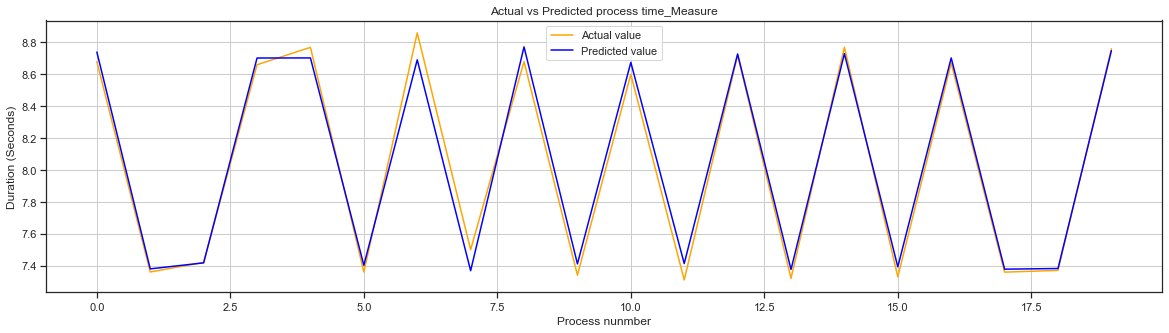

In [166]:
#Actual vs Predicted
df2 = pd.DataFrame(y_test_new, columns = ['Actual'])
df2['Predicted']=pd.DataFrame(y_pred_mlr_new, columns = ['Predicted'])
print(df2)

plt.figure(figsize=(20, 5))
plt.title('Actual vs Predicted process time_Measure')
plt.plot(y_test_new,label='Actual value', color='orange')
plt.plot(y_pred_mlr_new,label='Predicted value', color='blue')
plt.xlabel('Process nunmber')
plt.ylabel('Duration (Seconds)')
plt.legend()
plt.grid()
plt.show()

df2.to_csv("MLR new actual and predicted time.csv")

Here, there is small variation on process time and the small predicted error of the ML models. Without assuming some variation, this ML model provides better output prediction. However in this case, MLR received a more accurate result predicting the Process time measure.

In [167]:
################################################################################

**Minimum possible process time (Measure Products)**


Mathematical Optimization for Machine Learning Models<br>
Optimization is the problem of finding a set of inputs to an objective function that results in a maximum or minimum function evaluation.

Optimization : differential_evolution

In [169]:
from scipy.optimize import differential_evolution

In [170]:
import scipy
print(scipy.__version__)

1.7.3


In [182]:
##############################################################

Multiple Linear Regression model - Optimization<br>

Optimization : differential_evolution

In [184]:
from matplotlib import pyplot

# all data set
model_full=mlr
x31=x_test_MLR #all dataset

def obj_fun(x31):
    x = [x31]
    results = model_full.predict(x)
    obj_fun.counter += 1
    #print(obj_fun.counter)
    return results.ravel()

n = len(x31)

boundaries = [(x31[0:n, 0].min(), x31[0:n, 0].max()),(x31[0:n, 1].min(), x31[0:n, 1].max()),
             (x31[0:n, 2].min(), x31[0:n, 2].max()),(x31[0:n, 3].min(), x31[0:n, 3].max()),
             (x31[0:n, 4].min(), x31[0:n, 4].max()),(x31[0:n, 5].min(), x31[0:n, 5].max()),
             (x31[0:n, 6].min(), x31[0:n, 6].max()),(x31[0:n, 7].min(), x31[0:n, 7].max()),
             (x31[0:n, 8].min(), x31[0:n, 8].max()),(x31[0:n, 9].min(), x31[0:n, 9].max()),
             (x31[0:n, 10].min(), x31[0:n, 10].max()),(x31[0:n, 11].min(), x31[0:n, 11].max()),
             (x31[0:n, 12].min(), x31[0:n, 12].max())]

print(boundaries)
#boundaries
obj_fun.counter = 0

if __name__ == '__main__':
    
    
    #opt_results = differential_evolution(obj_fun, boundaries)
    opt_results = differential_evolution(obj_fun, boundaries, disp=True)
    print('Differential evolution optimization result')
    
    print('Status : %s' % opt_results['message'])
    print('Total numbe of Evaluations: %d' % opt_results['nfev'])
    print('Total number of iterations: %d' % opt_results['nit'])
    
    print('process time_Lift:', opt_results.x[0])
    print('handling time_Lift:', opt_results.x[1])
    print('handling time_Measure:', opt_results.x[2])
    print('process time_Position:', opt_results.x[3])
    print('handling time_Position:', opt_results.x[4])
    print('process time_Punch:', opt_results.x[5])
    print('process time_Glue:', opt_results.x[6])
    print('handling time_Glue:', opt_results.x[7])
    print('process time_Unlift:', opt_results.x[8])
    print('handling time_Unlift:', opt_results.x[9])
    print('handling_Lift to Measure:', opt_results.x[10])
    print('handling_Measure to Position:', opt_results.x[11])
    print('handling_Position to Punch:', opt_results.x[12])

    
    print("Minimum possible process time Measure: ", opt_results.fun)
    

[(6.699, 7.49), (1.099, 2.46), (1.099, 1.101), (2.1, 2.29), (5.73, 10.919), (1.17, 1.19), (0.489, 0.49), (7.309, 17.699), (5.8, 5.86), (2.65, 12.57), (1.099, 2.0), (1.099, 1.101), (5.73, 10.919)]
differential_evolution step 1: f(x)= 6.62983
differential_evolution step 2: f(x)= 6.4969
differential_evolution step 3: f(x)= 6.4969
differential_evolution step 4: f(x)= 6.46805
differential_evolution step 5: f(x)= 6.46805
differential_evolution step 6: f(x)= 6.46805
differential_evolution step 7: f(x)= 6.46805
differential_evolution step 8: f(x)= 6.46805
differential_evolution step 9: f(x)= 6.46805
differential_evolution step 10: f(x)= 6.46805
differential_evolution step 11: f(x)= 6.45112
differential_evolution step 12: f(x)= 6.45112
differential_evolution step 13: f(x)= 6.45112
differential_evolution step 14: f(x)= 6.44602
Differential evolution optimization result
Status : Optimization terminated successfully.
Total numbe of Evaluations: 2995
Total number of iterations: 14
process time_Lift

In [185]:
print("Minimum possible process time Measure: ", opt_results.fun)

Minimum possible process time Measure:  [6.40459933]


In [186]:
Actual_boundaries_mlr = [(y_test_MLR.min(), y_test_MLR.max())]
Actual_boundaries_mlr
print("Actual Minimum and Max process time Measure: ", Actual_boundaries_mlr)

Actual Minimum and Max process time Measure:  [(7.34, 8.82)]


In [187]:
Predict_boundaries_mlr = [(y_pred_MLR.min(), y_pred_MLR.max())]
Predict_boundaries_mlr
print("Predict Minimum and Max process time Measure: ", Predict_boundaries_mlr)

Predict Minimum and Max process time Measure:  [(7.359807909199184, 8.789281722179119)]


**Conclusions**

A Measure product process was chosen to determine the minimum duration of a specific process and for ML algorithms. For process time measure prediction, the MLR, SVR, DTR, and RF algorithms were used. The Multiple Linear Regression algorithm produced the best results in this analysis, with the lowest error in MAE, RMSE of test data, and cross validation. Due to the utilization of advanced technology and precise controls, the process time for a particular unit in an EGSS has only small variations. The MLR algorithm produced the best results with the minimum expected error for predicting the process time measure in this particular case without assuming some variation. The MLR model was then used with the differential evolution optimization method to calculate the shortest possible Measure process time. After 2382 evaluations and 11 iterations, the differential evolution optimizer discovered an optimal minimum process time of 6.4 seconds. 